In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
sparkling=pd.read_csv("Sparkling.csv")
rose=pd.read_csv("Rose.csv")


In [3]:
sparkling

YearMonth  Sparkling
0     1980-01       1686
1     1980-02       1591
2     1980-03       2304
3     1980-04       1712
4     1980-05       1471
..        ...        ...
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

[187 rows x 2 columns]

In [4]:
rose

YearMonth   Rose
0     1980-01  112.0
1     1980-02  118.0
2     1980-03  129.0
3     1980-04   99.0
4     1980-05  116.0
..        ...    ...
182   1995-03   45.0
183   1995-04   52.0
184   1995-05   28.0
185   1995-06   40.0
186   1995-07   62.0

[187 rows x 2 columns]

In [5]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [6]:
sparkling['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
sparkling.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [7]:
rose['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
rose.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [8]:
sparkling['Time_Stamp'] = pd.to_datetime(sparkling['Time_Stamp'])
rose['Time_Stamp'] = pd.to_datetime(rose['Time_Stamp'])

In [9]:
sparkling = sparkling.set_index('Time_Stamp')
sparkling.drop(['YearMonth'], axis=1, inplace=True)
sparkling.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [10]:
rose = rose.set_index('Time_Stamp')
rose.drop(['YearMonth'], axis=1, inplace=True)
rose.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

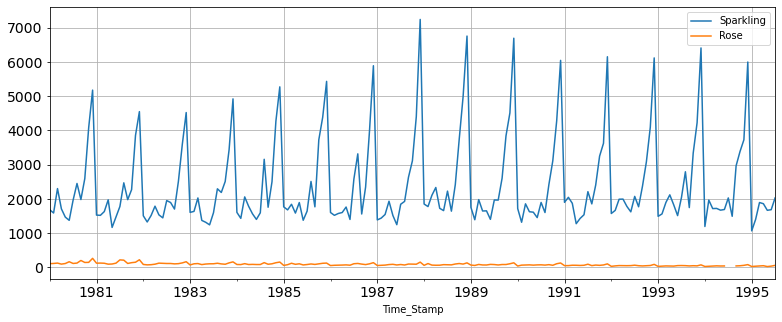

In [11]:
sparkling['Sparkling'].plot(figsize=(13,5), fontsize=14)
rose['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Sparkling','Rose'])
plt.show()

Text(0.5, 1.0, 'Sparkling dataset')

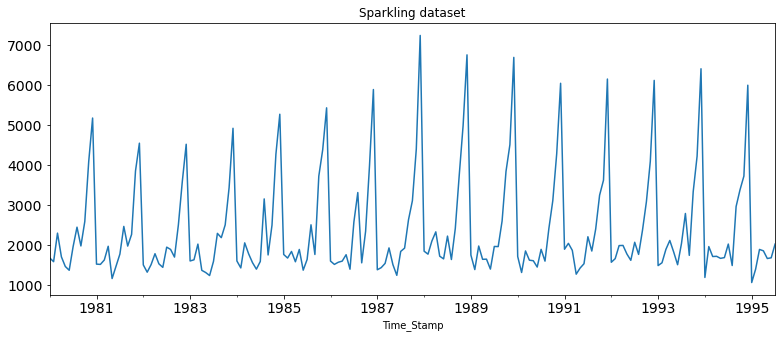

In [12]:
sparkling['Sparkling'].plot(figsize=(13,5), fontsize=14);
plt.title("Sparkling dataset")


Text(0.5, 1.0, 'Rose dataset')

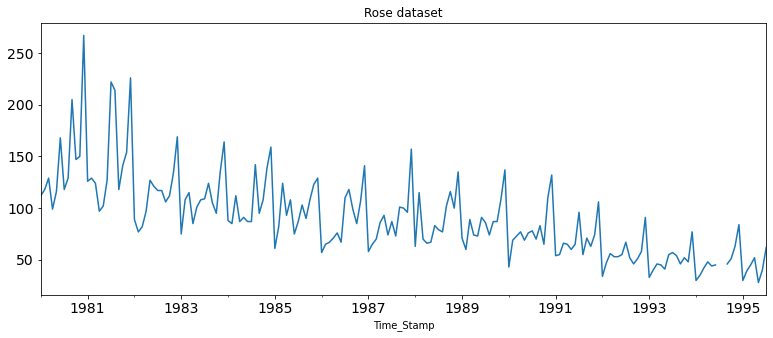

In [13]:
rose['Rose'].plot(figsize=(13,5), fontsize=14);
plt.title("Rose dataset")


In [14]:
sparkling.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [15]:
sparkling .isnull().sum()

Sparkling    0
dtype: int64

In [16]:
sparkling.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [17]:
rose.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

In [18]:
rose.isnull().sum()

Rose    2
dtype: int64

In [19]:
null_data = rose[rose.isnull().any(axis=1)]

In [20]:
null_data

Rose
Time_Stamp      
1994-07-31   NaN
1994-08-31   NaN

In [21]:
rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [22]:
rose=rose.interpolate()

In [23]:
rose.isnull().sum()

Rose    0
dtype: int64

In [24]:
rose.describe()

Rose
count  187.000000
mean    89.914439
std     39.238325
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

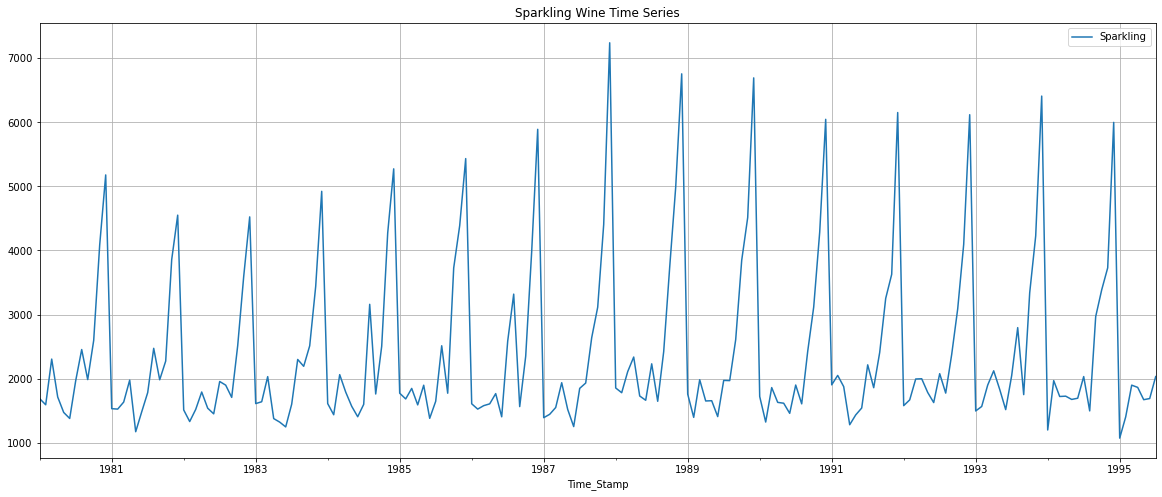

In [25]:
sparkling.plot(figsize=(20,8));
plt.grid()
plt.title("Sparkling Wine Time Series");

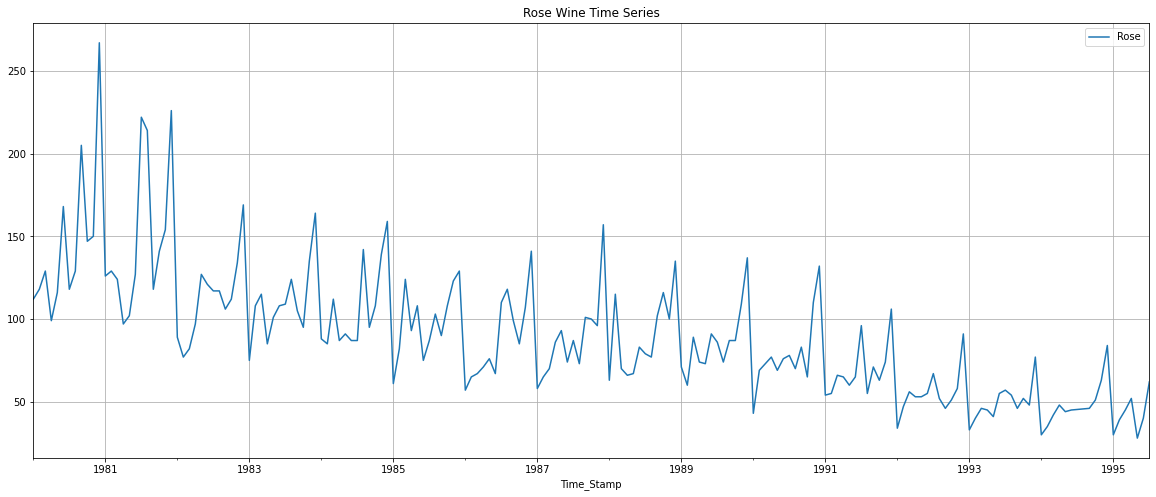

In [26]:
rose.plot(figsize=(20,8));
plt.grid()
plt.title("Rose Wine Time Series");

<Figure size 432x288 with 0 Axes>

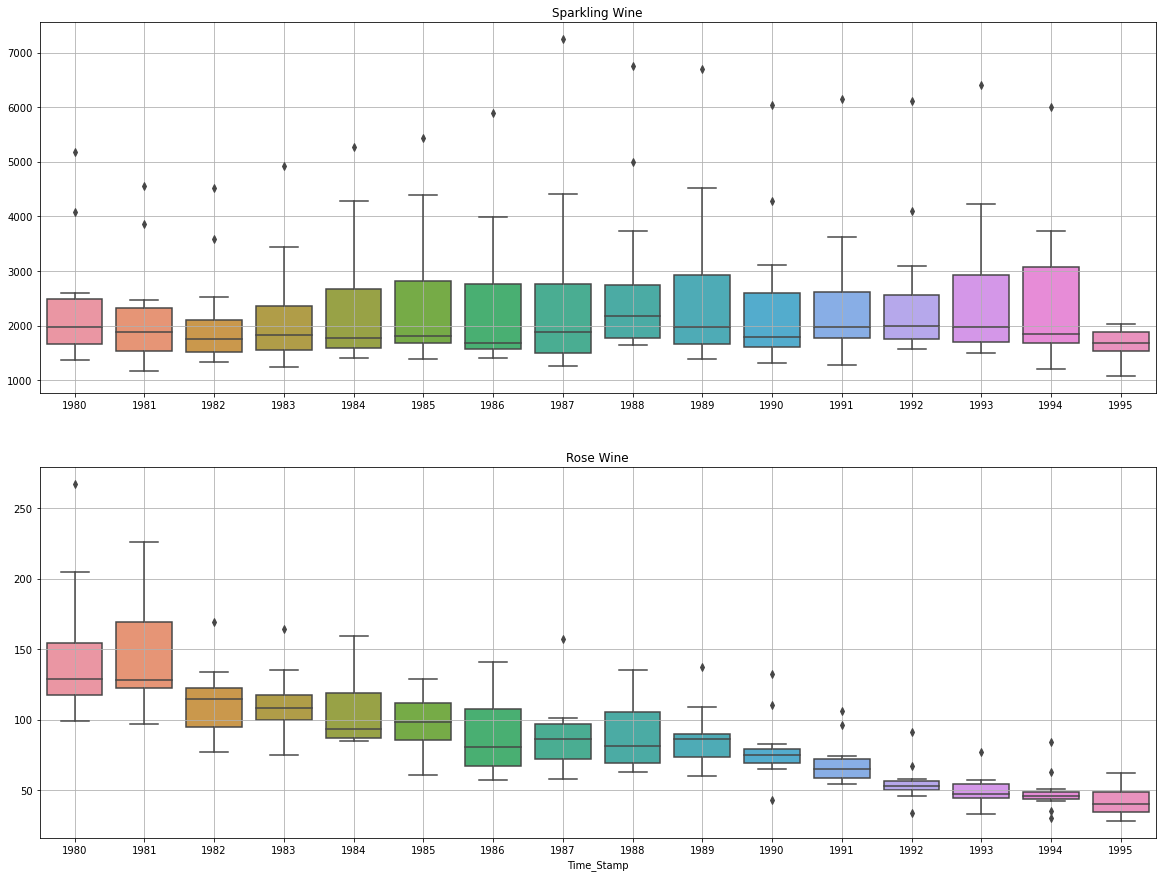

In [27]:
plt.figure()
fig, ax = plt.subplots(2,1,figsize=(20,15))
ax[0].title.set_text("Sparkling Wine")
sns.boxplot(x = sparkling.index.year,y = sparkling.values[:,0],ax=ax[0]);
ax[0].set_xlabel(" ")
ax[0].grid()
sns.boxplot(x = rose.index.year,y = rose.values[:,0],ax=ax[1]);
ax[1].title.set_text("Rose Wine")
ax[1].grid()

<Figure size 432x288 with 0 Axes>

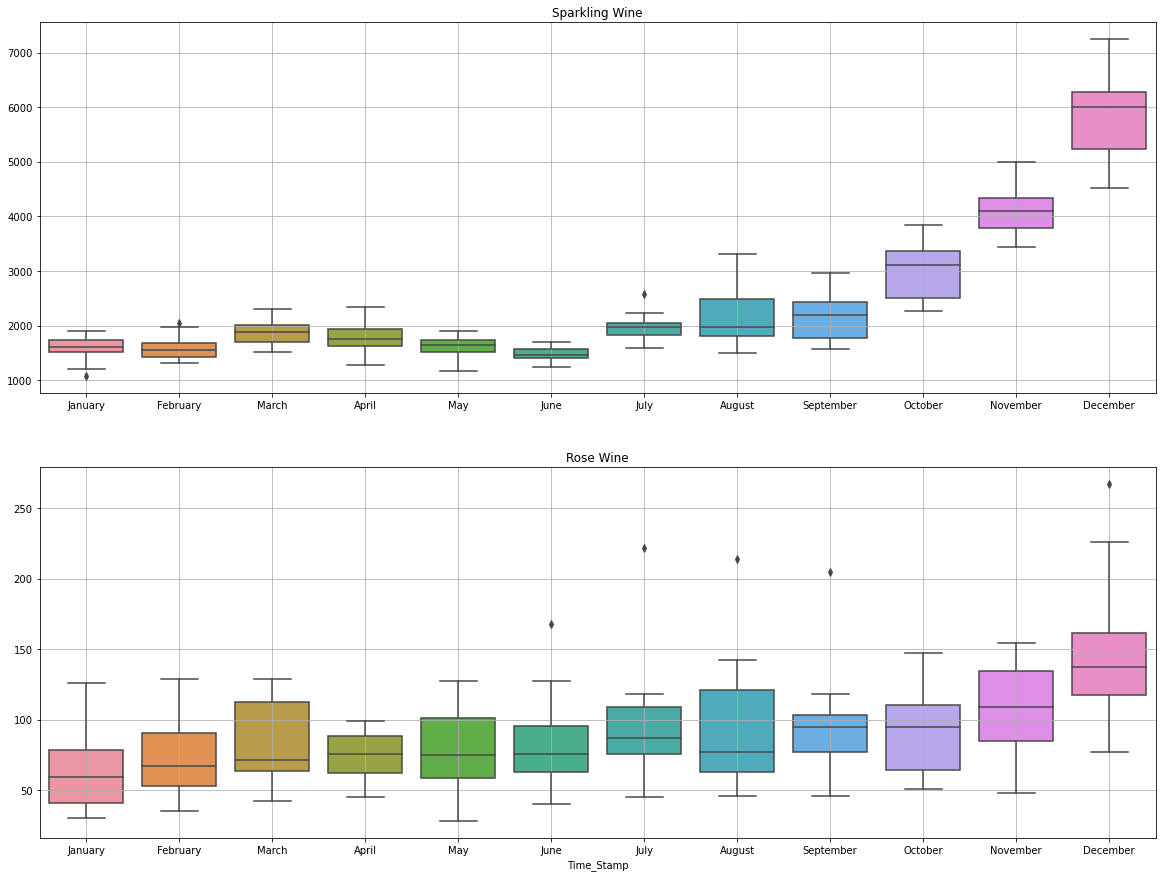

In [28]:
plt.figure()
fig, ax = plt.subplots(2,1,figsize=(20,15))
ax[0].title.set_text("Sparkling Wine")
sns.boxplot(x = sparkling.index.month_name(),y = sparkling.values[:,0],ax=ax[0]);
ax[0].set_xlabel(" ")
ax[0].grid()
sns.boxplot(x = rose.index.month_name(),y = rose.values[:,0],ax=ax[1]);
ax[1].title.set_text("Rose Wine")
ax[1].grid()

In [29]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

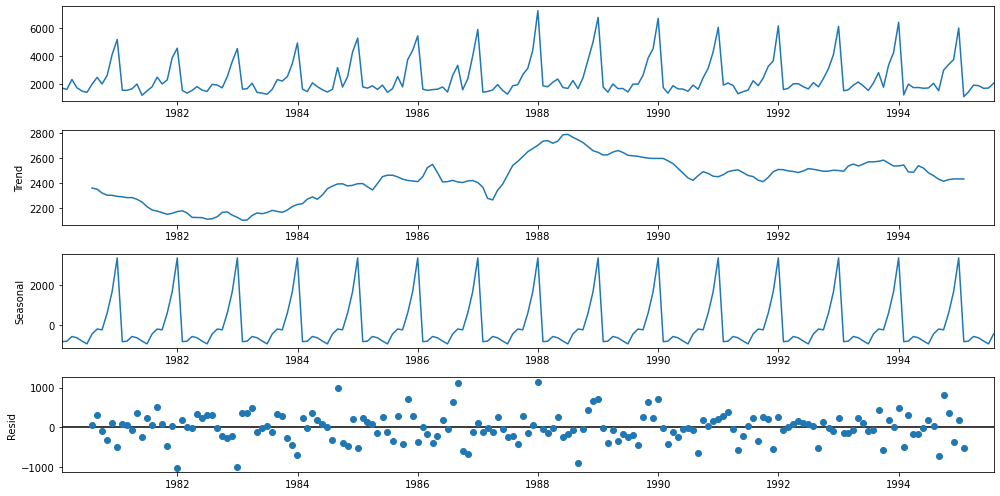

In [30]:
decomposition = seasonal_decompose(sparkling,model='additive')

from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

decomposition.plot()
plt.show()

In [31]:
decomposition = seasonal_decompose(sparkling,model='multiplicative')

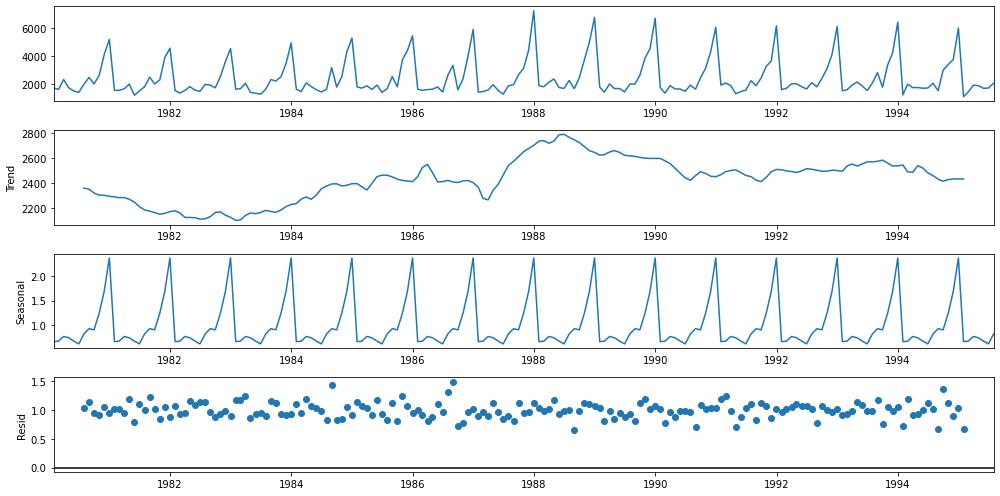

In [32]:

rcParams['figure.figsize'] = 14, 7

decomposition.plot()
plt.show()

In [33]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

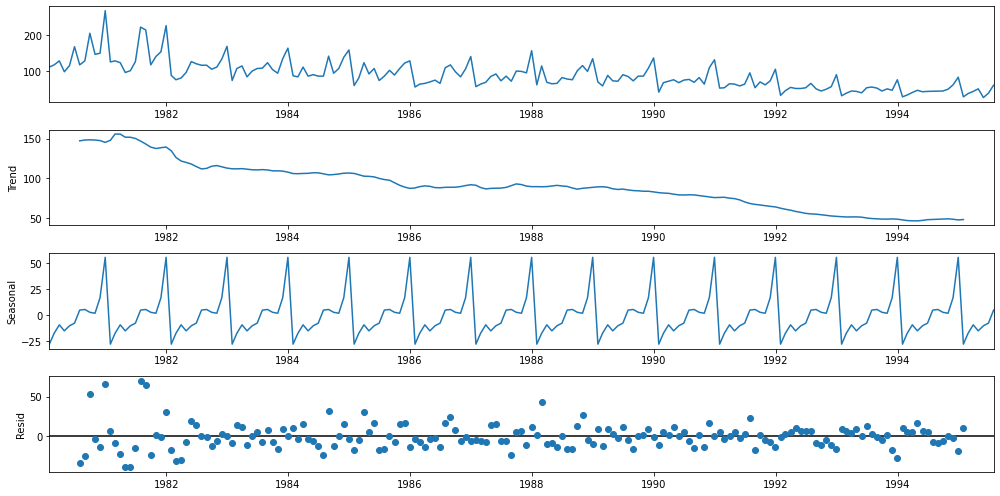

In [34]:
decomposition = seasonal_decompose(rose,model='additive')

rcParams['figure.figsize'] = 14, 7

decomposition.plot()
plt.show()

In [35]:
decomposition = seasonal_decompose(rose,model='multiplicative')

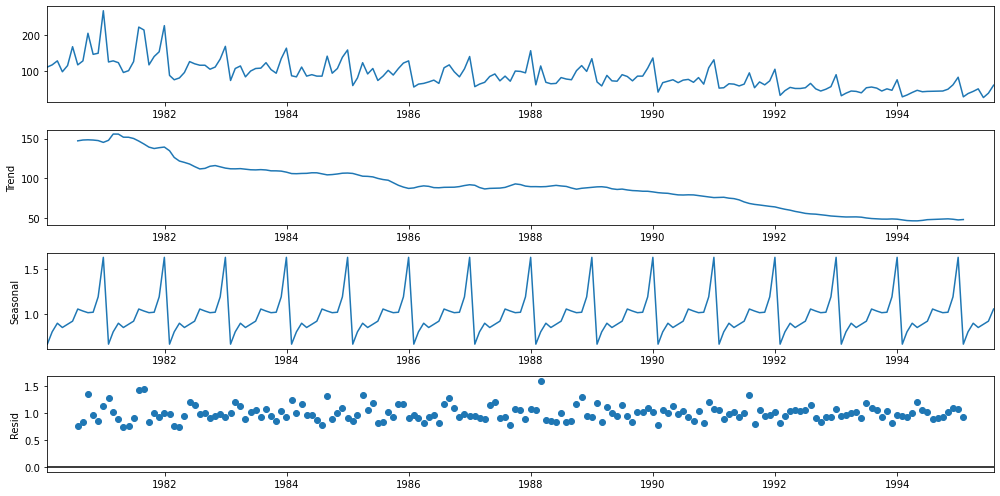

In [36]:
rcParams['figure.figsize'] = 14, 7

decomposition.plot()
plt.show()

In [37]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Name: resid, dtype:

In [38]:
rtrain = rose[rose.index<'1991'] 
rtest = rose[rose.index>='1991']
strain = sparkling[sparkling.index<'1991'] 
stest = sparkling[sparkling.index>='1991']

In [39]:
strain

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471
...               ...
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

[132 rows x 1 columns]

In [40]:
stest

Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432
1991-06-30       1540
1991-07-31       2214
1991-08-31       1857
1991-09-30       2408
1991-10-31       3252
1991-11-30       3627
1991-12-31       6153
1992-01-31       1577
1992-02-29       1667
1992-03-31       1993
1992-04-30       1997
1992-05-31       1783
1992-06-30       1625
1992-07-31       2076
1992-08-31       1773
1992-09-30       2377
1992-10-31       3088
1992-11-30       4096
1992-12-31       6119
1993-01-31       1494
1993-02-28       1564
1993-03-31       1898
1993-04-30       2121
1993-05-31       1831
1993-06-30       1515
1993-07-31       2048
1993-08-31       2795
1993-09-30       1749
1993-10-31       3339
1993-11-30       4227
1993-12-31       6410
1994-01-31       1197
1994-02-28       1968
1994-03-31       1720
1994-04-30       1725
1994-05-31       1674
1994-06-30       1693
1994-07-31       2031
1994-08-31       1495
1994-09-30       2968
1994-10-31       3385
1994-11-30       3729
1994-12-31       5999
1995-01-31       1070
1995-02-28       1402
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [41]:
rtrain

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0
...           ...
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

[132 rows x 1 columns]

In [42]:
rtest

Rose
Time_Stamp            
1991-01-31   54.000000
1991-02-28   55.000000
1991-03-31   66.000000
1991-04-30   65.000000
1991-05-31   60.000000
1991-06-30   65.000000
1991-07-31   96.000000
1991-08-31   55.000000
1991-09-30   71.000000
1991-10-31   63.000000
1991-11-30   74.000000
1991-12-31  106.000000
1992-01-31   34.000000
1992-02-29   47.000000
1992-03-31   56.000000
1992-04-30   53.000000
1992-05-31   53.000000
1992-06-30   55.000000
1992-07-31   67.000000
1992-08-31   52.000000
1992-09-30   46.000000
1992-10-31   51.000000
1992-11-30   58.000000
1992-12-31   91.000000
1993-01-31   33.000000
1993-02-28   40.000000
1993-03-31   46.000000
1993-04-30   45.000000
1993-05-31   41.000000
1993-06-30   55.000000
1993-07-31   57.000000
1993-08-31   54.000000
1993-09-30   46.000000
1993-10-31   52.000000
1993-11-30   48.000000
1993-12-31   77.000000
1994-01-31   30.000000
1994-02-28   35.000000
1994-03-31   42.000000
1994-04-30   48.000000
1994-05-31   44.000000
1994-06-30   45.000000
1994-07-31   45.333333
1994-08-31   45.666667
1994-09-30   46.000000
1994-10-31   51.000000
1994-11-30   63.000000
1994-12-31   84.000000
1995-01-31   30.000000
1995-02-28   39.000000
1995-03-31   45.000000
1995-04-30   52.000000
1995-05-31   28.000000
1995-06-30   40.000000
1995-07-31   62.000000

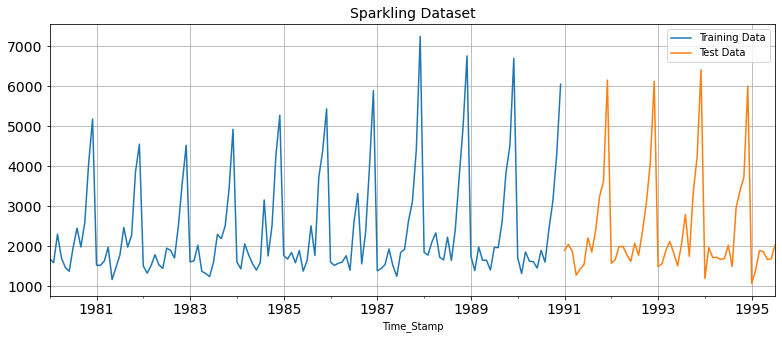

In [43]:
strain['Sparkling'].plot(figsize=(13,5), fontsize=14)
stest['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title("Sparkling Dataset", fontsize=14)
plt.show()

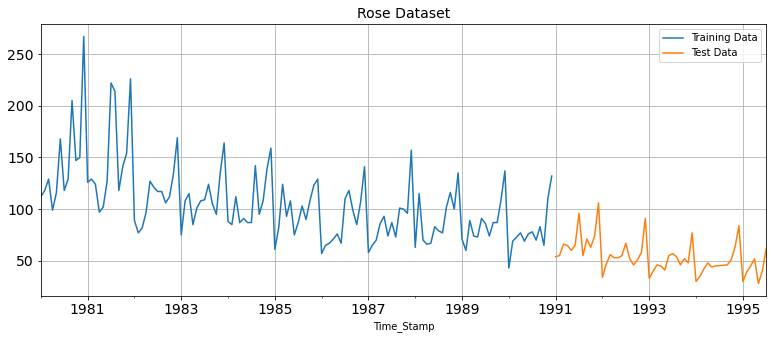

In [44]:
rtrain['Rose'].plot(figsize=(13,5), fontsize=14)
rtest['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title("Rose Dataset", fontsize=14)
plt.show()

# LINEAR REGRESSION

In [45]:
strain_time = [i+1 for i in range(len(strain))]
stest_time = [i+len(strain)+1 for i in range(len(stest))]
print("Instance for Sparkling dataset\n")
print('Training Time instance','\n',strain_time)
print('Test Time instance','\n',stest_time)

Instance for Sparkling dataset

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [46]:
rtrain_time = [i+1 for i in range(len(rtrain))]
rtest_time = [i+len(rtrain)+1 for i in range(len(rtest))]
print("Instance for Rose dataset\n")
print('Training Time instance','\n',rtrain_time)
print('Test Time instance','\n',rtest_time)

Instance for Rose dataset

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [47]:
LinearRegression_rtrain = rtrain.copy()
LinearRegression_rtest = rtest.copy()
LinearRegression_strain = strain.copy()
LinearRegression_stest = stest.copy()

In [48]:
LinearRegression_strain['time'] = strain_time
LinearRegression_stest['time'] = stest_time

print('First few rows of Training Data','\n',LinearRegression_strain.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_strain.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_stest.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_stest.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [49]:
LinearRegression_rtrain['time'] = rtrain_time
LinearRegression_rtest['time'] = rtest_time

print('First few rows of Training Data','\n',LinearRegression_rtrain.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_rtrain.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_rtest.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_rtest.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr = LinearRegression()

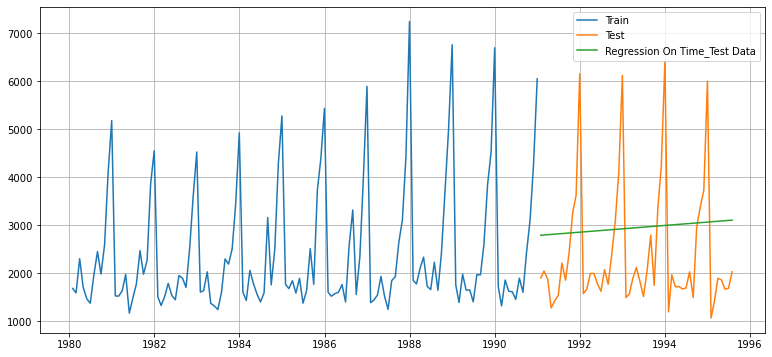

In [52]:
lr.fit(LinearRegression_strain[['time']],LinearRegression_strain['Sparkling'].values)

stest_predictions_model1         = lr.predict(LinearRegression_stest[['time']])

#Add the predictions as a separate column in the test data set created for linear regression
LinearRegression_stest['RegOnTime'] = stest_predictions_model1

#Plot the Actual value which is 'Sales' with the predicted which is 'RegOnTime'
plt.figure(figsize=(13,6))
plt.plot( strain['Sparkling'], label='Train')#Actual Train data
plt.plot(stest['Sparkling'], label='Test')#Actual Test data
plt.plot(LinearRegression_stest['RegOnTime'], label='Regression On Time_Test Data')#Model predicted values on test
plt.legend(loc='best')
plt.grid();

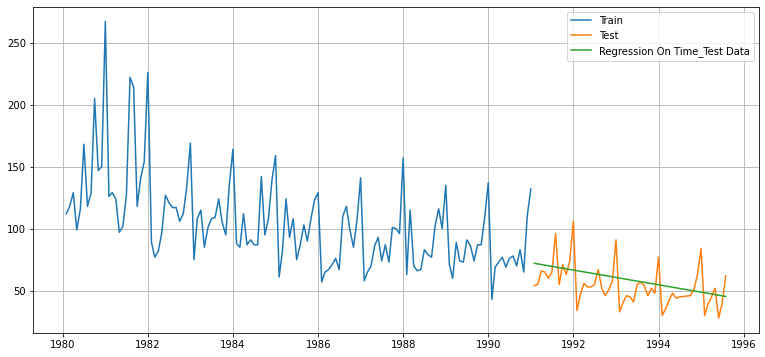

In [53]:
lr.fit(LinearRegression_rtrain[['time']],LinearRegression_rtrain['Rose'].values)
rtest_predictions_model1         = lr.predict(LinearRegression_rtest[['time']])

#Add the predictions as a separate column in the test data set created for linear regression
LinearRegression_rtest['RegOnTime'] = rtest_predictions_model1

#Plot the Actual value which is 'Sales' with the predicted which is 'RegOnTime'
plt.figure(figsize=(13,6))
plt.plot( rtrain['Rose'], label='Train')#Actual Train data
plt.plot(rtest['Rose'], label='Test')#Actual Test data
plt.plot(LinearRegression_rtest['RegOnTime'], label='Regression On Time_Test Data')#Model predicted values on test
plt.legend(loc='best')
plt.grid();

In [54]:
from sklearn.metrics import  mean_squared_error as mse

In [55]:
## Test Data - RMSE
#Check the metrics by comparing the Actual vs preducted values on test data
rmse_model1_stest = mse(stest['Sparkling'],stest_predictions_model1,squared=False)
#Print the output
print("For RegressionOnTime forecast on the Test Data,  RMSE is {}".format(round(rmse_model1_stest,3)))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [56]:
## Test Data - RMSE
#Check the metrics by comparing the Actual vs preducted values on test data
rmse_model1_rtest = mse(rtest['Rose'],rtest_predictions_model1,squared=False)
#Print the output
print("For RegressionOnTime forecast on the Test Data,  RMSE is {}".format(round(rmse_model1_rtest,3)))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269


In [57]:
resultsDf = pd.DataFrame({'Sparkling Test RMSE': [],'Sparkling-Alpha':[],'Sparkling-Beta':[],'Sparkling-Gamma':[],
                          'Rose Test RMSE':[],'Rose-Alpha':[],'Rose-Beta':[],'Rose-Gamma':[]})
resultsDf

Empty DataFrame
Columns: [Sparkling Test RMSE, Sparkling-Alpha, Sparkling-Beta, Sparkling-Gamma, Rose Test RMSE, Rose-Alpha, Rose-Beta, Rose-Gamma]
Index: []

In [58]:
resultsDf_1 = pd.DataFrame({'Sparkling Test RMSE': [rmse_model1_stest],'Rose Test RMSE':[rmse_model1_rtest]},index=['RegressionOnTime'])
resultsDf = pd.concat([resultsDf, resultsDf_1])
resultsDf

Sparkling Test RMSE  Sparkling-Alpha  Sparkling-Beta  \
RegressionOnTime          1389.135175              NaN             NaN   

                  Sparkling-Gamma  Rose Test RMSE  Rose-Alpha  Rose-Beta  \
RegressionOnTime              NaN       15.268955         NaN        NaN   

                  Rose-Gamma  
RegressionOnTime         NaN

# NAIVE MODEL

In [59]:
NaiveModel_strain = strain.copy()
NaiveModel_stest = stest.copy()
NaiveModel_rtrain = rtrain.copy()
NaiveModel_rtest = rtest.copy()

In [60]:
NaiveModel_stest['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]

NaiveModel_rtest['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]


In [61]:
NaiveModel_stest['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

In [62]:
NaiveModel_rtest['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

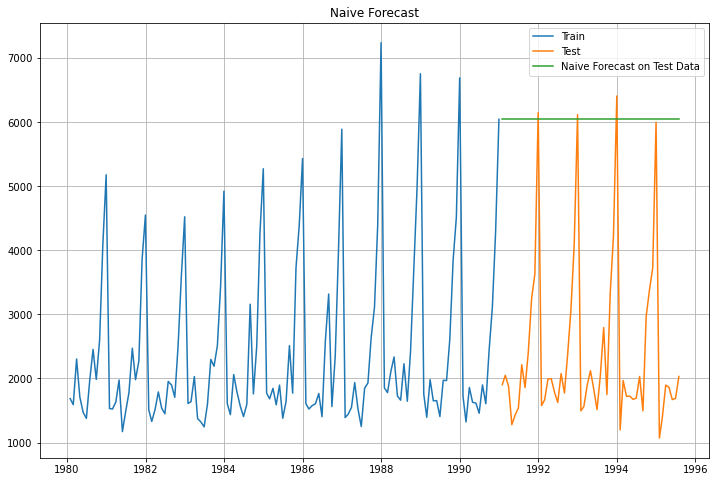

In [63]:
#Plot the actual and predicted values from Naive model
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')
plt.plot(NaiveModel_stest['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

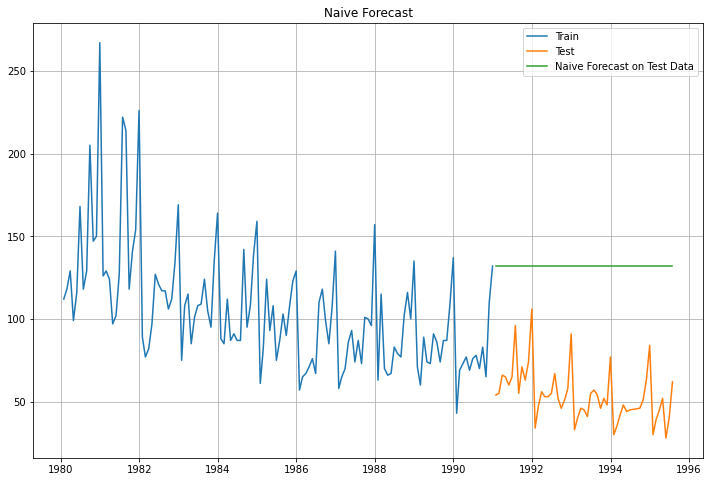

In [64]:
#Plot the actual and predicted values from Naive model
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.plot(NaiveModel_rtest['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [65]:
rmse_model2_stest = mse(stest['Sparkling'],NaiveModel_stest['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data for Sparkling,  RMSE is {}".format(round(rmse_model2_stest,3)))

For RegressionOnTime forecast on the Test Data for Sparkling,  RMSE is 3864.279


In [66]:
rmse_model2_rtest = mse(rtest['Rose'],NaiveModel_rtest['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data for Rose,  RMSE is {}".format(round(rmse_model2_rtest,3)))

For RegressionOnTime forecast on the Test Data for Rose,  RMSE is 79.719


In [67]:
resultsDf_2 = pd.DataFrame({'Sparkling Test RMSE': [rmse_model2_stest],'Rose Test RMSE':[rmse_model2_rtest]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Sparkling Test RMSE  Sparkling-Alpha  Sparkling-Beta  \
RegressionOnTime          1389.135175              NaN             NaN   
NaiveModel                3864.279352              NaN             NaN   

                  Sparkling-Gamma  Rose Test RMSE  Rose-Alpha  Rose-Beta  \
RegressionOnTime              NaN       15.268955         NaN        NaN   
NaiveModel                    NaN       79.718773         NaN        NaN   

                  Rose-Gamma  
RegressionOnTime         NaN  
NaiveModel               NaN

# Simple Average

In [68]:
SimpleAverage_strain = strain.copy()
SimpleAverage_stest = stest.copy()
SimpleAverage_rtrain = rtrain.copy()
SimpleAverage_rtest = rtest.copy()

In [69]:
SimpleAverage_stest['mean_forecast'] = strain['Sparkling'].mean()
SimpleAverage_stest.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

In [70]:
SimpleAverage_rtest['mean_forecast'] = rtrain['Rose'].mean()
SimpleAverage_rtest.head()

Rose  mean_forecast
Time_Stamp                     
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

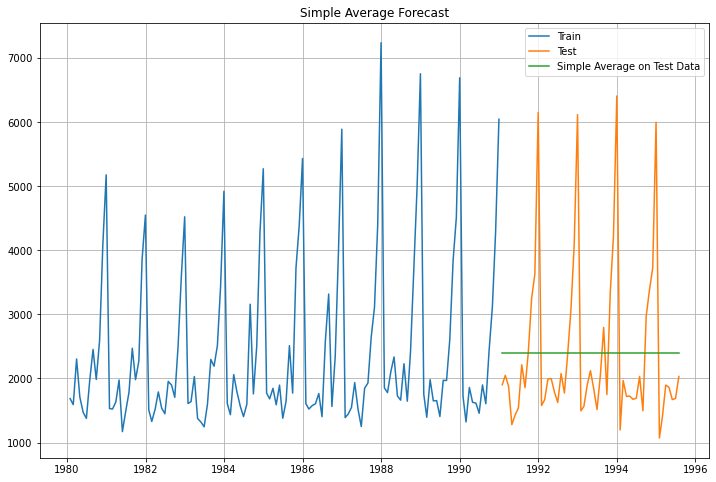

In [71]:
#Plot the actual vs predicted for the simple average model
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_strain['Sparkling'], label='Train')
plt.plot(SimpleAverage_stest['Sparkling'], label='Test')
plt.plot(SimpleAverage_stest['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

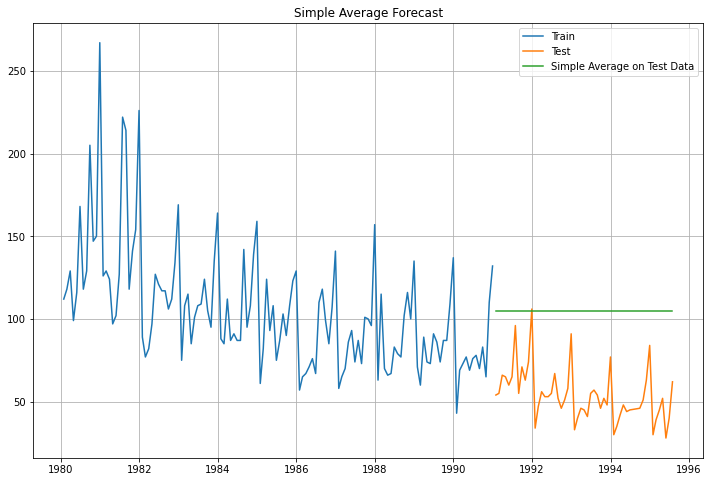

In [72]:
#Plot the actual vs predicted for the simple average model
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_rtrain['Rose'], label='Train')
plt.plot(SimpleAverage_rtest['Rose'], label='Test')
plt.plot(SimpleAverage_rtest['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [73]:
rmse_model3_stest = mse(stest['Sparkling'],SimpleAverage_stest['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data for Sparkling,  RMSE is {}".format(round(rmse_model3_stest,3)))

For Simple Average forecast on the Test Data for Sparkling,  RMSE is 1275.082


In [74]:
rmse_model3_rtest=mse(rtest['Rose'],SimpleAverage_rtest['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data for Rose, RMSE is {}".format(round(rmse_model3_rtest,3)))

For Simple Average forecast on the Test Data for Rose, RMSE is 53.461


In [75]:
resultsDf_3 = pd.DataFrame({'Sparkling Test RMSE': [rmse_model3_stest],'Rose Test RMSE':[rmse_model3_rtest]},index=['AverageModel'])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Sparkling Test RMSE  Sparkling-Alpha  Sparkling-Beta  \
RegressionOnTime          1389.135175              NaN             NaN   
NaiveModel                3864.279352              NaN             NaN   
AverageModel              1275.081804              NaN             NaN   

                  Sparkling-Gamma  Rose Test RMSE  Rose-Alpha  Rose-Beta  \
RegressionOnTime              NaN       15.268955         NaN        NaN   
NaiveModel                    NaN       79.718773         NaN        NaN   
AverageModel                  NaN       53.460570         NaN        NaN   

                  Rose-Gamma  
RegressionOnTime         NaN  
NaiveModel               NaN  
AverageModel             NaN


# Moving Average

In [76]:
#Take a copy of the entire data set to write custom function that will calculate moving average
S_MovingAverage = sparkling.copy()
S_MovingAverage.head()


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [77]:
R_MovingAverage = rose.copy()
R_MovingAverage.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [78]:
#Moving average with various time periods namely 2 months, 4 months, 6 months and 8 months
#All the values are added into the data frame as separate columns
S_MovingAverage['Trailing_2'] = S_MovingAverage['Sparkling'].rolling(2).mean()
S_MovingAverage['Trailing_4'] = S_MovingAverage['Sparkling'].rolling(4).mean()
S_MovingAverage['Trailing_6'] = S_MovingAverage['Sparkling'].rolling(6).mean()
S_MovingAverage['Trailing_9'] = S_MovingAverage['Sparkling'].rolling(9).mean()

S_MovingAverage.head(10)

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
Time_Stamp                                                             
1980-01-31       1686         NaN         NaN          NaN          NaN
1980-02-29       1591      1638.5         NaN          NaN          NaN
1980-03-31       2304      1947.5         NaN          NaN          NaN
1980-04-30       1712      2008.0     1823.25          NaN          NaN
1980-05-31       1471      1591.5     1769.50          NaN          NaN
1980-06-30       1377      1424.0     1716.00  1690.166667          NaN
1980-07-31       1966      1671.5     1631.50  1736.833333          NaN
1980-08-31       2453      2209.5     1816.75  1880.500000          NaN
1980-09-30       1984      2218.5     1945.00  1827.166667  1838.222222
1980-10-31       2596      2290.0     2249.75  1974.500000  1939.333333

In [79]:
#Moving average with various time periods namely 2 months, 4 months, 6 months and 8 months
#All the values are added into the data frame as separate columns
R_MovingAverage['Trailing_2'] = R_MovingAverage['Rose'].rolling(2).mean()
R_MovingAverage['Trailing_4'] = R_MovingAverage['Rose'].rolling(4).mean()
R_MovingAverage['Trailing_6'] = R_MovingAverage['Rose'].rolling(6).mean()
R_MovingAverage['Trailing_9'] = R_MovingAverage['Rose'].rolling(9).mean()

R_MovingAverage.head(10)

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0      114.50         NaN         NaN
1980-05-31  116.0       107.5      115.50         NaN         NaN
1980-06-30  168.0       142.0      128.00  123.666667         NaN
1980-07-31  118.0       143.0      125.25  124.666667         NaN
1980-08-31  129.0       123.5      132.75  126.500000         NaN
1980-09-30  205.0       167.0      155.00  139.166667  132.666667
1980-10-31  147.0       176.0      149.75  147.166667  136.555556

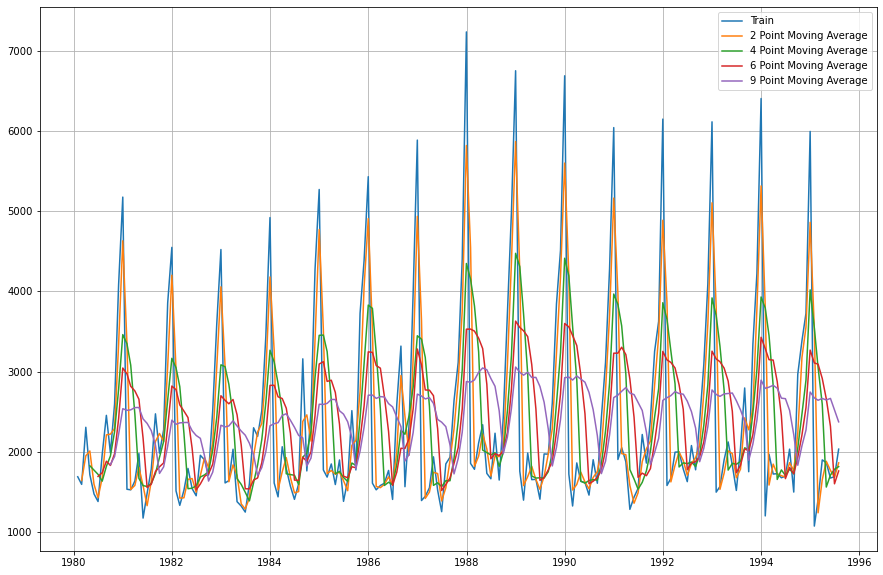

In [80]:
plt.figure(figsize=(15,10))
plt.plot(S_MovingAverage['Sparkling'], label='Train')
plt.plot(S_MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(S_MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(S_MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(S_MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

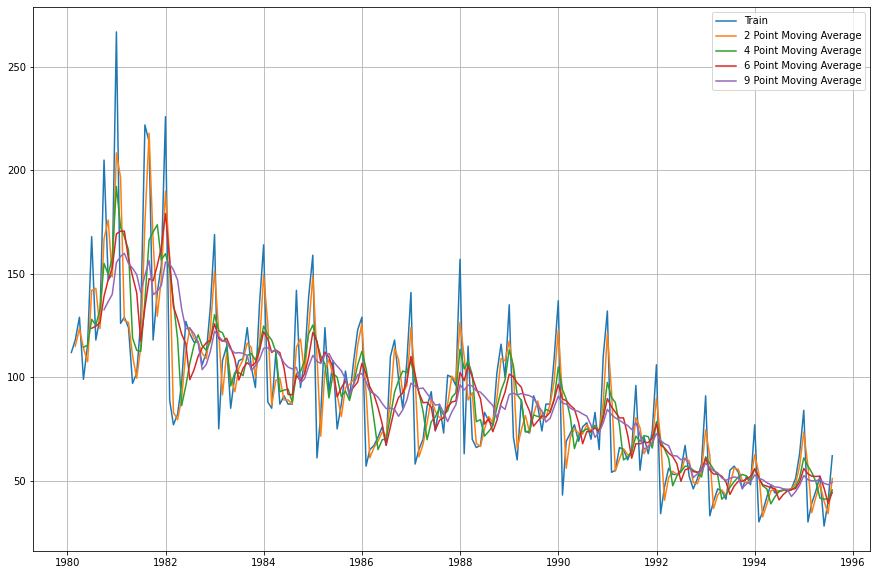

In [81]:
plt.figure(figsize=(15,10))
plt.plot(R_MovingAverage['Rose'], label='Train')
plt.plot(R_MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(R_MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(R_MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(R_MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [82]:
MovingAverage_rtrain = R_MovingAverage[R_MovingAverage.index<'1991'] 
MovingAverage_rtest = R_MovingAverage[R_MovingAverage.index>='1991']
MovingAverage_strain = S_MovingAverage[S_MovingAverage.index<'1991'] 
MovingAverage_stest = S_MovingAverage[S_MovingAverage.index>='1991']

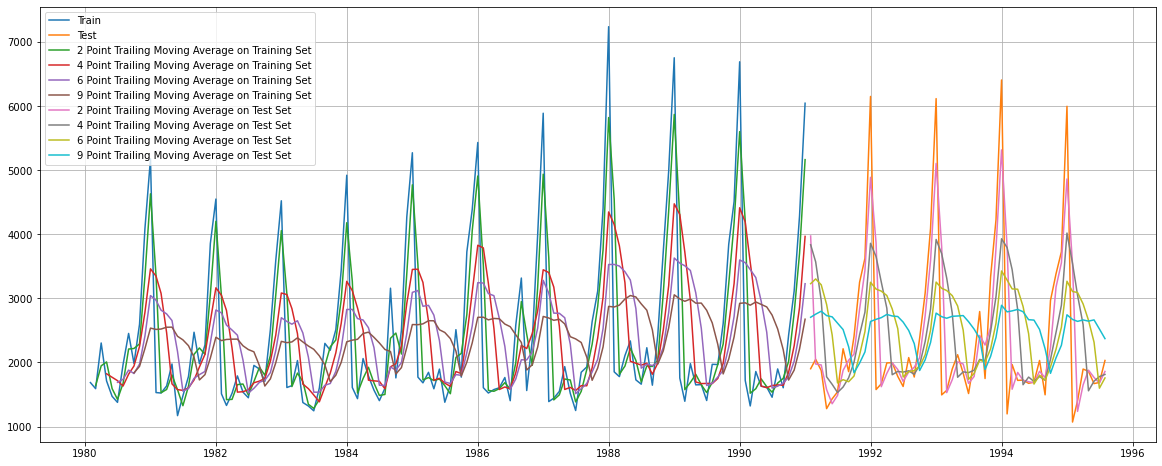

In [83]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(MovingAverage_strain['Sparkling'], label='Train')
plt.plot(MovingAverage_stest['Sparkling'], label='Test')

plt.plot(MovingAverage_strain['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_strain['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_strain['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_strain['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(MovingAverage_stest['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_stest['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_stest['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_stest['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

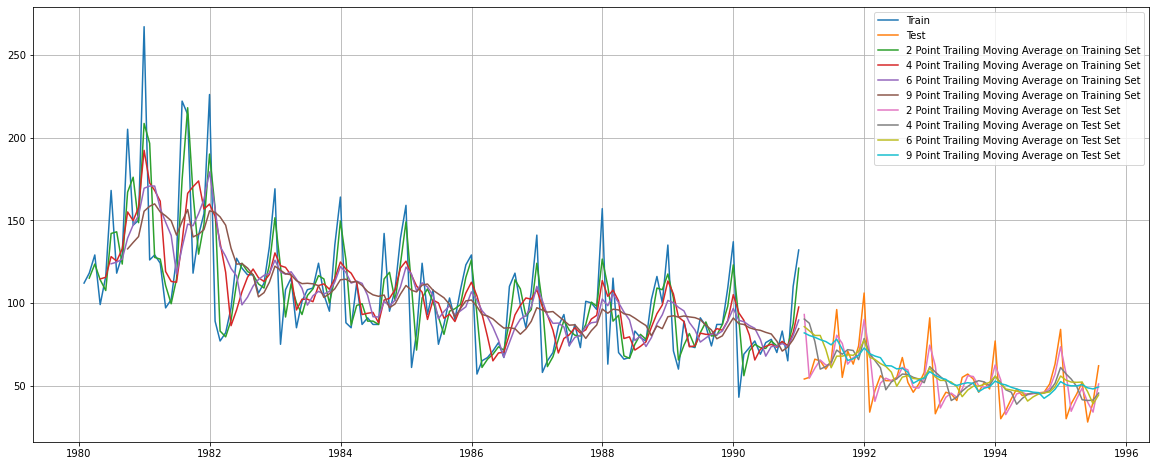

In [84]:
plt.figure(figsize=(20,8))
plt.plot(MovingAverage_rtrain['Rose'], label='Train')
plt.plot(MovingAverage_rtest['Rose'], label='Test')

plt.plot(MovingAverage_rtrain['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_rtrain['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_rtrain['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_rtrain['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(MovingAverage_rtest['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_rtest['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_rtest['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_rtest['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [85]:
## Test Data for Sparkling - RMSE --> 2 point Trailing MA

rmse_model4_stest_2 = mse(stest['Sparkling'],MovingAverage_stest['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data for Sparkling,  RMSE is {}".format(rmse_model4_stest_2))

## Test Data for Sparkling - RMSE  --> 4 point Trailing MA

rmse_model4_stest_4 = mse(stest['Sparkling'],MovingAverage_stest['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data for Sparkling,  RMSE is {}".format(rmse_model4_stest_4))

## Test Data for Sparkling - RMSE --> 6 point Trailing MA

rmse_model4_stest_6 = mse(stest['Sparkling'],MovingAverage_stest['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data for Sparkling,  RMSE is {}".format(rmse_model4_stest_6))

## Test Data for Sparkling - RMSE  --> 9 point Trailing MA

rmse_model4_stest_9 = mse(stest['Sparkling'],MovingAverage_stest['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data for Sparkling,  RMSE is {}".format(rmse_model4_stest_9))

For 2 point Moving Average Model forecast on the Test Data for Sparkling,  RMSE is 813.4006839972983
For 4 point Moving Average Model forecast on the Test Data for Sparkling,  RMSE is 1156.589694081071
For 6 point Moving Average Model forecast on the Test Data for Sparkling,  RMSE is 1283.9274280129855
For 9 point Moving Average Model forecast on the Test Data for Sparkling,  RMSE is 1346.2783154241804


In [86]:
## Test Data for Rose - RMSE --> 2 point Trailing MA

rmse_model4_rtest_2 = mse(rtest['Rose'],MovingAverage_rtest['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data for Rose,  RMSE is {}".format(rmse_model4_rtest_2))

## Test Data for Rose - RMSE  --> 4 point Trailing MA

rmse_model4_rtest_4 = mse(rtest['Rose'],MovingAverage_rtest['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data for Rose,  RMSE is {}".format(rmse_model4_rtest_4))

## Test Data for Rose - RMSE --> 6 point Trailing MA

rmse_model4_rtest_6 = mse(rtest['Rose'],MovingAverage_rtest['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data for Rose,  RMSE is {}".format(rmse_model4_rtest_6))

## Test Data for Rose - RMSE  --> 9 point Trailing MA

rmse_model4_rtest_9 = mse(rtest['Rose'],MovingAverage_rtest['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data for Rose,  RMSE is {}".format(rmse_model4_rtest_9))

For 2 point Moving Average Model forecast on the Test Data for Rose,  RMSE is 11.52927761935857
For 4 point Moving Average Model forecast on the Test Data for Rose,  RMSE is 14.451403238286431
For 6 point Moving Average Model forecast on the Test Data for Rose,  RMSE is 14.566327265691354
For 9 point Moving Average Model forecast on the Test Data for Rose,  RMSE is 14.727629822363193


In [87]:
resultsDf_4 = pd.DataFrame({'Sparkling Test RMSE': [rmse_model4_stest_2,rmse_model4_stest_4
                                          ,rmse_model4_stest_6,rmse_model4_stest_9],
                           'Rose Test RMSE': [rmse_model4_rtest_2,rmse_model4_rtest_4
                                          ,rmse_model4_rtest_6,rmse_model4_rtest_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Sparkling Test RMSE  Sparkling-Alpha  \
RegressionOnTime                     1389.135175              NaN   
NaiveModel                           3864.279352              NaN   
AverageModel                         1275.081804              NaN   
2pointTrailingMovingAverage           813.400684              NaN   
4pointTrailingMovingAverage          1156.589694              NaN   
6pointTrailingMovingAverage          1283.927428              NaN   
9pointTrailingMovingAverage          1346.278315              NaN   

                             Sparkling-Beta  Sparkling-Gamma  Rose Test RMSE  \
RegressionOnTime                        NaN              NaN       15.268955   
NaiveModel                              NaN              NaN       79.718773   
AverageModel                            NaN              NaN       53.460570   
2pointTrailingMovingAverage             NaN              NaN       11.529278   
4pointTrailingMovingAverage             NaN              NaN       14.451403   
6pointTrailingMovingAverage             NaN              NaN       14.566327   
9pointTrailingMovingAverage             NaN              NaN       14.727630   

                             Rose-Alpha  Rose-Beta  Rose-Gamma  
RegressionOnTime                    NaN        NaN         NaN  
NaiveModel                          NaN        NaN         NaN  
AverageModel                        NaN        NaN         NaN  
2pointTrailingMovingAverage         NaN        NaN         NaN  
4pointTrailingMovingAverage         NaN        NaN         NaN  
6pointTrailingMovingAverage         NaN        NaN         NaN  
9pointTrailingMovingAverage         NaN        NaN         NaN

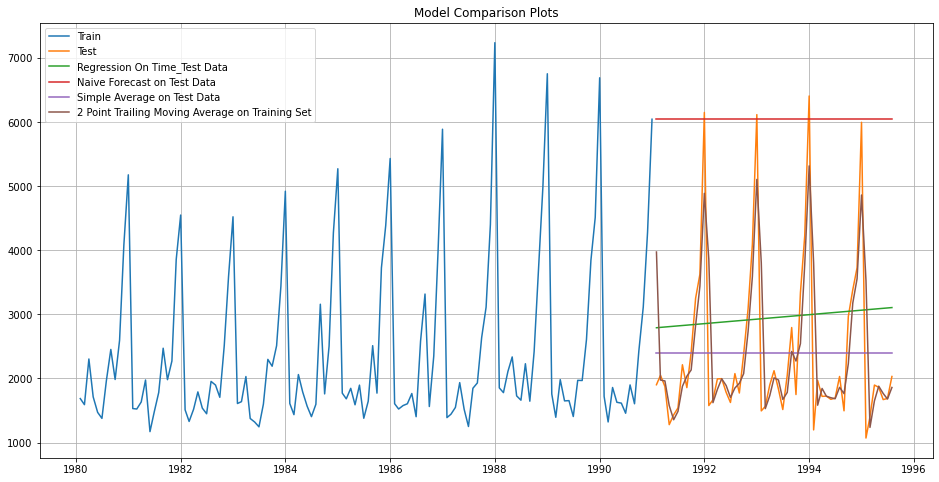

In [88]:
## Plotting on both Training and Test data

plt.figure(figsize=(16,8))
plt.plot(strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')

plt.plot(LinearRegression_stest['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_stest['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_stest['mean_forecast'], label='Simple Average on Test Data')

plt.plot(MovingAverage_stest['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

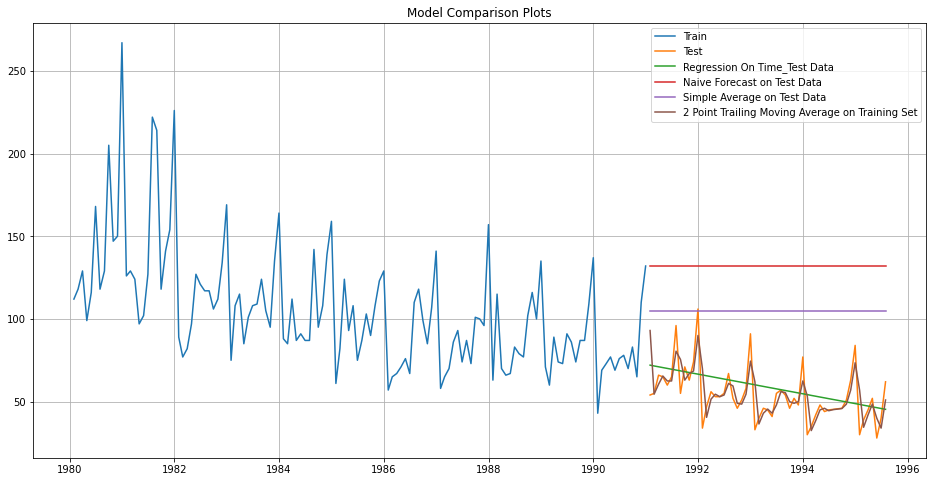

In [89]:
## Plotting on both Training and Test data

plt.figure(figsize=(16,8))
plt.plot(rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')

plt.plot(LinearRegression_rtest['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_rtest['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_rtest['mean_forecast'], label='Simple Average on Test Data')

plt.plot(MovingAverage_rtest['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# Simple Exponential Smoothening

In [90]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [91]:
SES_strain = strain.copy()
SES_stest = stest.copy()
SES_rtrain = rtrain.copy()
SES_rtest = rtest.copy()

In [92]:
S_model_SES = SimpleExpSmoothing(SES_strain,initialization_method='estimated' )
R_model_SES = SimpleExpSmoothing(SES_rtrain,initialization_method='estimated' )

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [93]:
S_model_SES_autofit = S_model_SES.fit(optimized=True)
R_model_SES_autofit = R_model_SES.fit(optimized=True)

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [94]:
## Let us check the parameters

S_model_SES_autofit.params

{'smoothing_level': 0.07029120765764557,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.0137060346985,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [95]:
R_model_SES_autofit.params

{'smoothing_level': 0.09874983698117956,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702481818487,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [96]:
SES_stest['predict'] = S_model_SES_autofit.forecast(steps=len(stest))
#SES_test.head()
rmse_model5_stest_1 = mse(SES_stest['Sparkling'],SES_stest['predict'],squared=False)
print("For Alpha ={} Simple Exponential Smoothing Model forecast on the Test Data for Sparkling, RMSE is {}" .format(round(S_model_SES_autofit.params['smoothing_level'],5),round(rmse_model5_stest_1,3)))

For Alpha =0.07029 Simple Exponential Smoothing Model forecast on the Test Data for Sparkling, RMSE is 1338.008


In [97]:
SES_rtest['predict'] = R_model_SES_autofit.forecast(steps=len(rtest))
#SES_test.head()
rmse_model5_rtest_1 = mse(SES_rtest['Rose'],SES_rtest['predict'],squared=False)
print("For Alpha ={} Simple Exponential Smoothing Model forecast on the Test Data for Rose, RMSE is {}" .format(round(R_model_SES_autofit.params['smoothing_level'],5),round(rmse_model5_rtest_1,3)))

For Alpha =0.09875 Simple Exponential Smoothing Model forecast on the Test Data for Rose, RMSE is 36.796


In [98]:
#resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
#resultsDf_6

In [99]:


#for i in np.arange(0.3,1,0.01):#Generate a rane of alpha values from 0.3 till 1
   # S_model_SES_alpha_i = S_model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)#For each alpha fit model
    #SES_strain['predict',i] = S_model_SES_alpha_i.fittedvalues #Get the fitted values in train
    #SES_stest['predict',i] = S_model_SES_alpha_i.forecast(steps=len(stest)) #Get the forecasted values in test
    #calculate the performance metrics on train
    #rmse_model5_strain_i = mse(SES_strain['Sparkling'],SES_strain['predict',i],squared=False)
    #performance metric on test
    #rmse_model5_stest_i = mse(SES_stest['Sparkling'],SES_stest['predict',i],squared=False)
    #Place results into data frame
    #resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_strain_i 
       #                               ,'Test RMSE':rmse_model5_stest_i}, ignore_index=True)


In [100]:
#resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

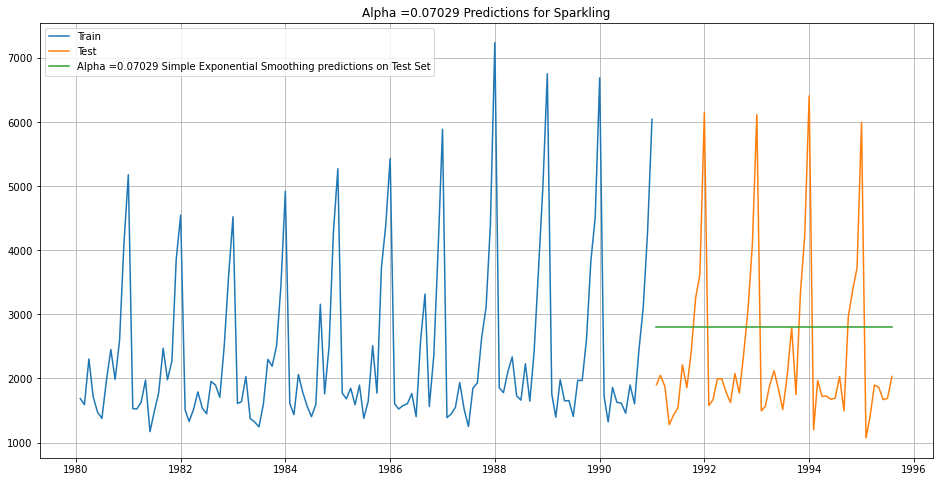

In [101]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_strain['Sparkling'], label='Train')
plt.plot(SES_stest['Sparkling'], label='Test')

plt.plot(SES_stest['predict'], label='Alpha =0.07029 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.07029 Predictions for Sparkling');

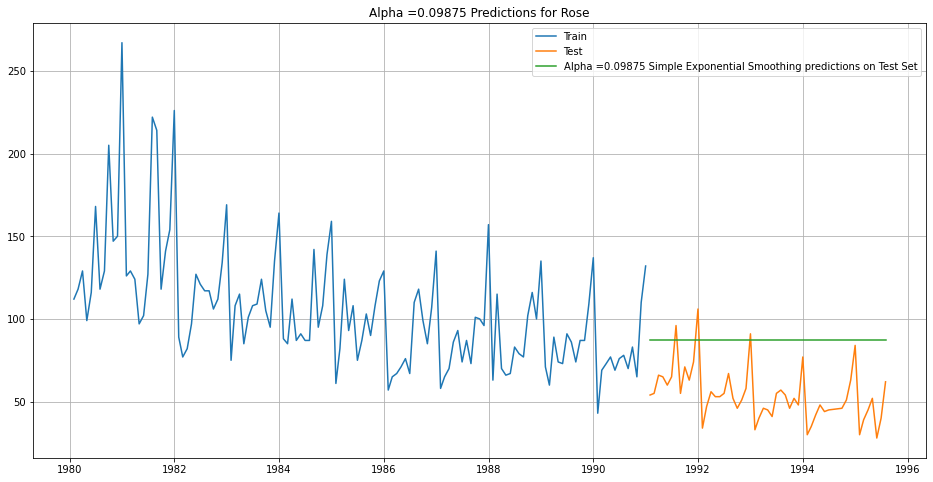

In [102]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_rtrain['Rose'], label='Train')
plt.plot(SES_rtest['Rose'], label='Test')

plt.plot(SES_rtest['predict'], label='Alpha =0.09875 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.09875 Predictions for Rose');

In [103]:
#resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

#resultsDf = pd.concat([resultsDf, resultsDf_5])
#resultsDf

resultsDf_5 = pd.DataFrame({'Sparkling Test RMSE': [rmse_model5_stest_1],'Sparkling-Alpha':[round(S_model_SES_autofit.params['smoothing_level'],5)],
                            'Rose Test RMSE':[rmse_model5_rtest_1],'Rose-Alpha':[round(R_model_SES_autofit.params['smoothing_level'],5)]},index=['Simple Exponential Smoothening'])
resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Sparkling Test RMSE  Sparkling-Alpha  \
RegressionOnTime                        1389.135175              NaN   
NaiveModel                              3864.279352              NaN   
AverageModel                            1275.081804              NaN   
2pointTrailingMovingAverage              813.400684              NaN   
4pointTrailingMovingAverage             1156.589694              NaN   
6pointTrailingMovingAverage             1283.927428              NaN   
9pointTrailingMovingAverage             1346.278315              NaN   
Simple Exponential Smoothening          1338.008384          0.07029   

                                Sparkling-Beta  Sparkling-Gamma  \
RegressionOnTime                           NaN              NaN   
NaiveModel                                 NaN              NaN   
AverageModel                               NaN              NaN   
2pointTrailingMovingAverage                NaN              NaN   
4pointTrailingMovingAverage                NaN              NaN   
6pointTrailingMovingAverage                NaN              NaN   
9pointTrailingMovingAverage                NaN              NaN   
Simple Exponential Smoothening             NaN              NaN   

                                Rose Test RMSE  Rose-Alpha  Rose-Beta  \
RegressionOnTime                     15.268955         NaN        NaN   
NaiveModel                           79.718773         NaN        NaN   
AverageModel                         53.460570         NaN        NaN   
2pointTrailingMovingAverage          11.529278         NaN        NaN   
4pointTrailingMovingAverage          14.451403         NaN        NaN   
6pointTrailingMovingAverage          14.566327         NaN        NaN   
9pointTrailingMovingAverage          14.727630         NaN        NaN   
Simple Exponential Smoothening       36.796241     0.09875        NaN   

                                Rose-Gamma  
RegressionOnTime                       NaN  
NaiveModel                             NaN  
AverageModel                           NaN  
2pointTrailingMovingAverage            NaN  
4pointTrailingMovingAverage            NaN  
6pointTrailingMovingAverage            NaN  
9pointTrailingMovingAverage            NaN  
Simple Exponential Smoothening         NaN

# Double Exponential Smoothing (Holt's Model)

In [104]:
DES_strain = strain.copy()
DES_stest = stest.copy()
DES_rtrain = rtrain.copy()
DES_rtest = rtest.copy()

In [105]:
S_model_DES = Holt(DES_strain['Sparkling'],initialization_method='estimated')
R_model_DES = Holt(DES_rtrain['Rose'],initialization_method='estimated')

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [106]:
S_model_DES_autofit = S_model_DES.fit(optimized=True)
R_model_DES_autofit = R_model_DES.fit(optimized=True)

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [107]:
S_model_DES_autofit.params

{'smoothing_level': 0.6649999999999999,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1502.1999999999991,
 'initial_trend': 74.87272727272739,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [108]:
R_model_DES_autofit.params

{'smoothing_level': 1.4901161193847656e-08,
 'smoothing_trend': 1.6610391146660035e-10,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81553690867275,
 'initial_trend': -0.4943781897068274,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [109]:
DES_stest['predict'] = S_model_DES_autofit.forecast(steps=len(stest))
#SES_test.head()
rmse_model6_stest = mse(DES_stest['Sparkling'],DES_stest['predict'],squared=False)
print("For Alpha ={} ,Beta={} ,Holt's Model forecast on the Test Data for Sparkling, RMSE is {}" .format(round(S_model_DES_autofit.params['smoothing_level'],5),round(S_model_DES_autofit.params['smoothing_trend'],5),round(rmse_model6_stest,3)))

For Alpha =0.665 ,Beta=0.0001 ,Holt's Model forecast on the Test Data for Sparkling, RMSE is 5291.88


In [110]:
DES_rtest['predict'] = R_model_DES_autofit.forecast(steps=len(rtest))
#SES_test.head()
rmse_model6_rtest = mse(DES_rtest['Rose'],DES_rtest['predict'],squared=False)
print("For Alpha =1.49e-08 ,Beta=1.66e-10 ,Holt's Model forecast on the Test Data for Rose, RMSE is {}" .format(round(rmse_model6_rtest,3)))

For Alpha =1.49e-08 ,Beta=1.66e-10 ,Holt's Model forecast on the Test Data for Rose, RMSE is 15.269


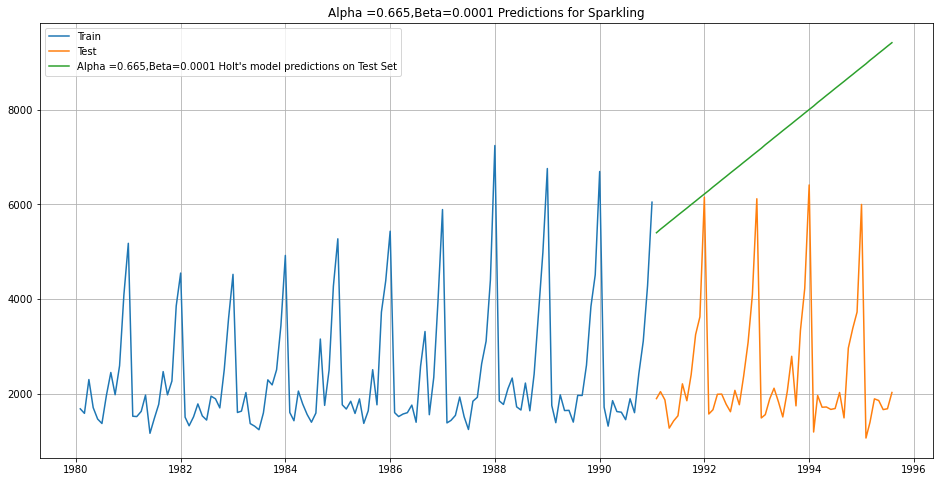

In [111]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_strain['Sparkling'], label='Train')
plt.plot(DES_stest['Sparkling'], label='Test')

plt.plot(DES_stest['predict'], label="Alpha =0.665,Beta=0.0001 Holt's model predictions on Test Set")

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.665,Beta=0.0001 Predictions for Sparkling');

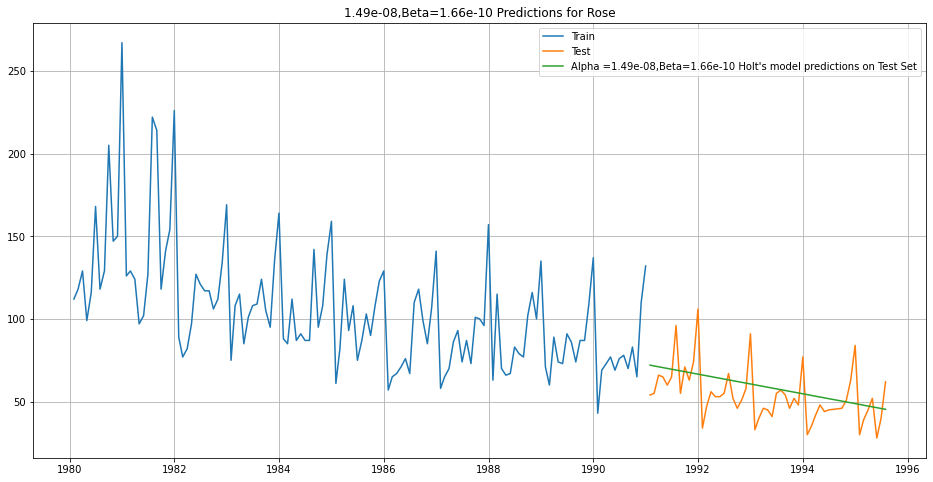

In [112]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_rtrain['Rose'], label='Train')
plt.plot(DES_rtest['Rose'], label='Test')

plt.plot(DES_rtest['predict'], label="Alpha =1.49e-08,Beta=1.66e-10 Holt's model predictions on Test Set")

plt.legend(loc='best')
plt.grid()
plt.title('1.49e-08,Beta=1.66e-10 Predictions for Rose');

In [113]:
resultsDf_6 = pd.DataFrame({'Sparkling Test RMSE': [rmse_model6_stest],'Sparkling-Alpha':[round(S_model_DES_autofit.params['smoothing_level'],5)],
                            'Sparkling-Beta':[round(S_model_DES_autofit.params['smoothing_trend'],5)],
                            'Rose Test RMSE':[rmse_model6_rtest],'Rose-Alpha':['1.49e-08'],
                            'Rose-Beta':['1.66e-10']},index=["Holt's Model"])
resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Sparkling Test RMSE  Sparkling-Alpha  \
RegressionOnTime                        1389.135175              NaN   
NaiveModel                              3864.279352              NaN   
AverageModel                            1275.081804              NaN   
2pointTrailingMovingAverage              813.400684              NaN   
4pointTrailingMovingAverage             1156.589694              NaN   
6pointTrailingMovingAverage             1283.927428              NaN   
9pointTrailingMovingAverage             1346.278315              NaN   
Simple Exponential Smoothening          1338.008384          0.07029   
Holt's Model                            5291.879833          0.66500   

                                Sparkling-Beta  Sparkling-Gamma  \
RegressionOnTime                           NaN              NaN   
NaiveModel                                 NaN              NaN   
AverageModel                               NaN              NaN   
2pointTrailingMovingAverage                NaN              NaN   
4pointTrailingMovingAverage                NaN              NaN   
6pointTrailingMovingAverage                NaN              NaN   
9pointTrailingMovingAverage                NaN              NaN   
Simple Exponential Smoothening             NaN              NaN   
Holt's Model                            0.0001              NaN   

                                Rose Test RMSE Rose-Alpha Rose-Beta  \
RegressionOnTime                     15.268955        NaN       NaN   
NaiveModel                           79.718773        NaN       NaN   
AverageModel                         53.460570        NaN       NaN   
2pointTrailingMovingAverage          11.529278        NaN       NaN   
4pointTrailingMovingAverage          14.451403        NaN       NaN   
6pointTrailingMovingAverage          14.566327        NaN       NaN   
9pointTrailingMovingAverage          14.727630        NaN       NaN   
Simple Exponential Smoothening       36.796241    0.09875       NaN   
Holt's Model                         15.268944   1.49e-08  1.66e-10   

                                Rose-Gamma  
RegressionOnTime                       NaN  
NaiveModel                             NaN  
AverageModel                           NaN  
2pointTrailingMovingAverage            NaN  
4pointTrailingMovingAverage            NaN  
6pointTrailingMovingAverage            NaN  
9pointTrailingMovingAverage            NaN  
Simple Exponential Smoothening         NaN  
Holt's Model                           NaN

# Holt's Winter Model

In [114]:
TES_strain = strain.copy()
TES_stest = stest.copy()
TES_rtrain = rtrain.copy()
TES_rtest = rtest.copy()

In [115]:
S_model_TES = ExponentialSmoothing(TES_strain['Sparkling'],trend='additive',seasonal='multiplicative',freq='M',initialization_method='estimated')
R_model_TES = ExponentialSmoothing(TES_rtrain['Rose'],trend='additive',seasonal='multiplicative',freq='M',initialization_method='estimated')

In [116]:
S_model_TES_autofit = S_model_TES.fit(optimized=True)
R_model_TES_autofit = R_model_TES.fit(optimized=True)

In [117]:
S_model_TES_autofit.params

{'smoothing_level': 0.11133818361298699,
 'smoothing_trend': 0.049505131019509915,
 'smoothing_seasonal': 0.3620795793580111,
 'damping_trend': nan,
 'initial_level': 2356.4967888704355,
 'initial_trend': -10.187944726007238,
 'initial_seasons': array([0.71296382, 0.68242226, 0.90755008, 0.80515228, 0.65597218,
        0.65414505, 0.88617935, 1.13345121, 0.92046306, 1.21337874,
        1.87340336, 2.37811768]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [118]:
R_model_TES_autofit.params

{'smoothing_level': 0.0715106306609405,
 'smoothing_trend': 0.04529179757535142,
 'smoothing_seasonal': 7.244325029450242e-05,
 'damping_trend': nan,
 'initial_level': 130.40839142502193,
 'initial_trend': -0.77985743179386,
 'initial_seasons': array([0.86218996, 0.977675  , 1.0687727 , 0.93403881, 1.050625  ,
        1.14410977, 1.25836944, 1.33937772, 1.26778766, 1.24131254,
        1.44724625, 1.99553681]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [119]:
TES_stest['predict'] = S_model_TES_autofit.forecast(steps=len(stest))
#SES_test.head()
rmse_model7_stest = mse(TES_stest['Sparkling'],TES_stest['predict'],squared=False)
print("For Alpha ={} ,Beta={} ,Gamma={} ,Holt's Model forecast on the Test Data for Sparkling, RMSE is {}" .format(round(S_model_TES_autofit.params['smoothing_level'],5),round(S_model_TES_autofit.params['smoothing_trend'],5),
                                                                                                                   round(S_model_TES_autofit.params['smoothing_seasonal'],5),round(rmse_model7_stest,3)))

For Alpha =0.11134 ,Beta=0.04951 ,Gamma=0.36208 ,Holt's Model forecast on the Test Data for Sparkling, RMSE is 404.287


In [120]:
TES_stest

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  1587.497468
1991-02-28       2049  1356.394925
1991-03-31       1874  1762.929755
1991-04-30       1279  1656.165933
1991-05-31       1432  1542.002730
1991-06-30       1540  1355.102435
1991-07-31       2214  1854.197719
1991-08-31       1857  1820.513188
1991-09-30       2408  2276.971718
1991-10-31       3252  3122.024202
1991-11-30       3627  4128.528561
1991-12-31       6153  5890.064588
1992-01-31       1577  1538.233708
1992-02-29       1667  1314.193684
1992-03-31       1993  1707.937498
1992-04-30       1997  1604.369388
1992-05-31       1783  1493.650618
1992-06-30       1625  1312.499576
1992-07-31       2076  1795.750753
1992-08-31       1773  1762.976871
1992-09-30       2377  2204.819253
1992-10-31       3088  3022.831861
1992-11-30       4096  3997.009544
1992-12-31       6119  5701.930382
1993-01-31       1494  1488.969948
1993-02-28       1564  1271.992443
1993-03-31       1898  1652.945240
1993-04-30       2121  1552.572843
1993-05-31       1831  1445.298507
1993-06-30       1515  1269.896716
1993-07-31       2048  1737.303788
1993-08-31       2795  1705.440555
1993-09-30       1749  2132.666788
1993-10-31       3339  2923.639519
1993-11-30       4227  3865.490526
1993-12-31       6410  5513.796176
1994-01-31       1197  1439.706189
1994-02-28       1968  1229.791202
1994-03-31       1720  1597.952983
1994-04-30       1725  1500.776298
1994-05-31       1674  1396.946396
1994-06-30       1693  1227.293857
1994-07-31       2031  1678.856822
1994-08-31       1495  1647.904238
1994-09-30       2968  2060.514323
1994-10-31       3385  2824.447177
1994-11-30       3729  3733.971509
1994-12-31       5999  5325.661970
1995-01-31       1070  1390.442429
1995-02-28       1402  1187.589961
1995-03-31       1897  1542.960726
1995-04-30       1862  1448.979753
1995-05-31       1670  1348.594284
1995-06-30       1688  1184.690998
1995-07-31       2031  1620.409857

In [121]:
TES_rtest['predict'] = R_model_TES_autofit.forecast(steps=len(rtest))
#SES_test.head()
rmse_model7_rtest = mse(TES_rtest['Rose'],TES_rtest['predict'],squared=False)
print("For Alpha ={} ,Beta={} ,Gamma={} ,Holt's Model forecast on the Test Data for Rose, RMSE is {}" .format(round(R_model_TES_autofit.params['smoothing_level'],5),round(R_model_TES_autofit.params['smoothing_trend'],5),
                                                                                                                   round(R_model_TES_autofit.params['smoothing_seasonal'],7),round(rmse_model6_rtest,3)))

For Alpha =0.07151 ,Beta=0.04529 ,Gamma=7.24e-05 ,Holt's Model forecast on the Test Data for Rose, RMSE is 15.269


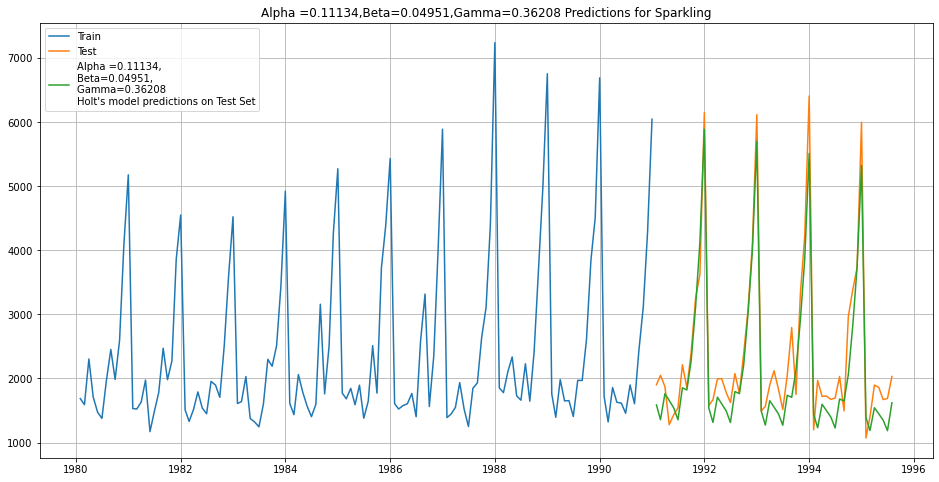

In [122]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(TES_strain['Sparkling'], label='Train')
plt.plot(TES_stest['Sparkling'], label='Test')

plt.plot(TES_stest['predict'], label="Alpha ={},\nBeta={},\nGamma={} \nHolt's model predictions on Test Set".format(round(S_model_TES_autofit.params['smoothing_level'],5),
                                                                                                       round(S_model_TES_autofit.params['smoothing_trend'],5),round(S_model_TES_autofit.params['smoothing_seasonal'],5)))

plt.legend(loc='best')
plt.grid()
plt.title('Alpha ={},Beta={},Gamma={} Predictions for Sparkling'.format(round(S_model_TES_autofit.params['smoothing_level'],5),
                                                                                                       round(S_model_TES_autofit.params['smoothing_trend'],5),round(S_model_TES_autofit.params['smoothing_seasonal'],5)));

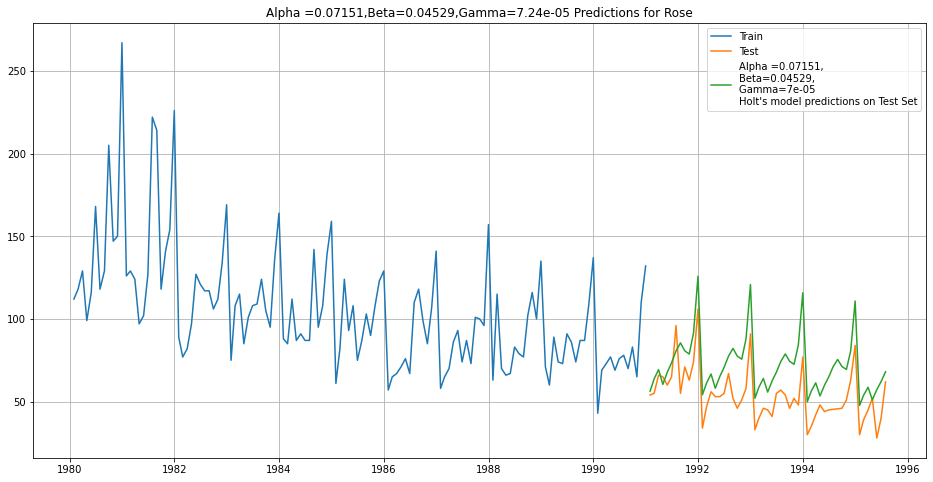

In [123]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(TES_rtrain['Rose'], label='Train')
plt.plot(TES_rtest['Rose'], label='Test')

plt.plot(TES_rtest['predict'], label="Alpha ={},\nBeta={},\nGamma={} \nHolt's model predictions on Test Set".format(round(R_model_TES_autofit.params['smoothing_level'],5),
                                                                                                       round(R_model_TES_autofit.params['smoothing_trend'],5),round(R_model_TES_autofit.params['smoothing_seasonal'],5)))

plt.legend(loc='best')
plt.grid()
plt.title('Alpha ={},Beta={},Gamma={} Predictions for Rose'.format(round(R_model_TES_autofit.params['smoothing_level'],5),
                                                                                                       round(R_model_TES_autofit.params['smoothing_trend'],5),round(R_model_TES_autofit.params['smoothing_seasonal'],7)));

In [124]:
resultsDf_7 = pd.DataFrame({'Sparkling Test RMSE': [rmse_model7_stest],'Sparkling-Alpha':[round(S_model_TES_autofit.params['smoothing_level'],5)],
                            'Sparkling-Beta':[round(S_model_TES_autofit.params['smoothing_trend'],5)],
                            'Sparkling-Gamma':[round(S_model_TES_autofit.params['smoothing_seasonal'],5)],
                            'Rose Test RMSE':[rmse_model6_rtest],'Rose-Alpha':[round(R_model_TES_autofit.params['smoothing_level'],5)],
                            'Rose-Beta':[round(R_model_TES_autofit.params['smoothing_trend'],5)],
                           'Rose-Gamma':[round(R_model_TES_autofit.params['smoothing_seasonal'],7)]},index=["Holt's Winter Model"])
resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

Sparkling Test RMSE  Sparkling-Alpha  \
RegressionOnTime                        1389.135175              NaN   
NaiveModel                              3864.279352              NaN   
AverageModel                            1275.081804              NaN   
2pointTrailingMovingAverage              813.400684              NaN   
4pointTrailingMovingAverage             1156.589694              NaN   
6pointTrailingMovingAverage             1283.927428              NaN   
9pointTrailingMovingAverage             1346.278315              NaN   
Simple Exponential Smoothening          1338.008384          0.07029   
Holt's Model                            5291.879833          0.66500   
Holt's Winter Model                      404.286809          0.11134   

                                Sparkling-Beta  Sparkling-Gamma  \
RegressionOnTime                           NaN              NaN   
NaiveModel                                 NaN              NaN   
AverageModel                               NaN              NaN   
2pointTrailingMovingAverage                NaN              NaN   
4pointTrailingMovingAverage                NaN              NaN   
6pointTrailingMovingAverage                NaN              NaN   
9pointTrailingMovingAverage                NaN              NaN   
Simple Exponential Smoothening             NaN              NaN   
Holt's Model                           0.00010              NaN   
Holt's Winter Model                    0.04951          0.36208   

                                Rose Test RMSE Rose-Alpha Rose-Beta  \
RegressionOnTime                     15.268955        NaN       NaN   
NaiveModel                           79.718773        NaN       NaN   
AverageModel                         53.460570        NaN       NaN   
2pointTrailingMovingAverage          11.529278        NaN       NaN   
4pointTrailingMovingAverage          14.451403        NaN       NaN   
6pointTrailingMovingAverage          14.566327        NaN       NaN   
9pointTrailingMovingAverage          14.727630        NaN       NaN   
Simple Exponential Smoothening       36.796241    0.09875       NaN   
Holt's Model                         15.268944   1.49e-08  1.66e-10   
Holt's Winter Model                  15.268944    0.07151   0.04529   

                                Rose-Gamma  
RegressionOnTime                       NaN  
NaiveModel                             NaN  
AverageModel                           NaN  
2pointTrailingMovingAverage            NaN  
4pointTrailingMovingAverage            NaN  
6pointTrailingMovingAverage            NaN  
9pointTrailingMovingAverage            NaN  
Simple Exponential Smoothening         NaN  
Holt's Model                           NaN  
Holt's Winter Model               0.000072

STATIONARITY

H0 : The Time Series has a unit root and is thus non-stationary.
 H1: The Time Series does not have a unit root and is thus stationary.

In [125]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    #rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    #orig = plt.plot(timeseries, color='blue',label='Original')
    #mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    #std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    #plt.legend(loc='best')
    #plt.title('Rolling Mean & Standard Deviation')
    #plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [126]:
test_stationarity(sparkling['Sparkling'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [127]:
test_stationarity(sparkling['Sparkling'].diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



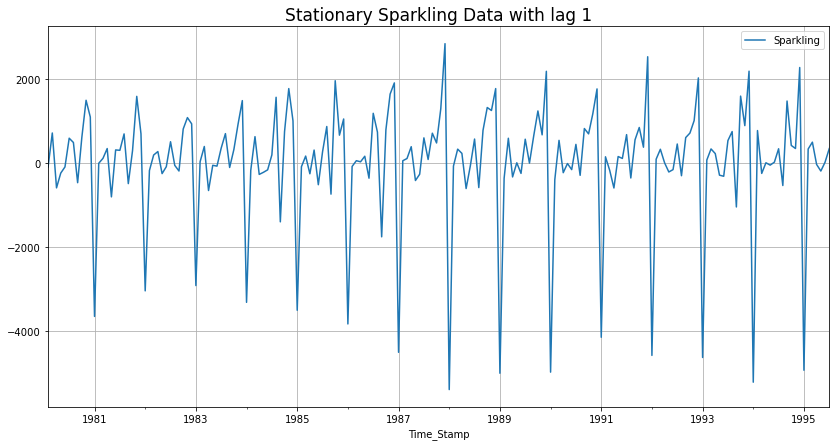

In [128]:
sparkling.diff().dropna().plot(grid=True);
plt.title('Stationary Sparkling Data with lag 1', fontsize=17);

In [129]:
test_stationarity(rose['Rose'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [130]:
test_stationarity(rose['Rose'].diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



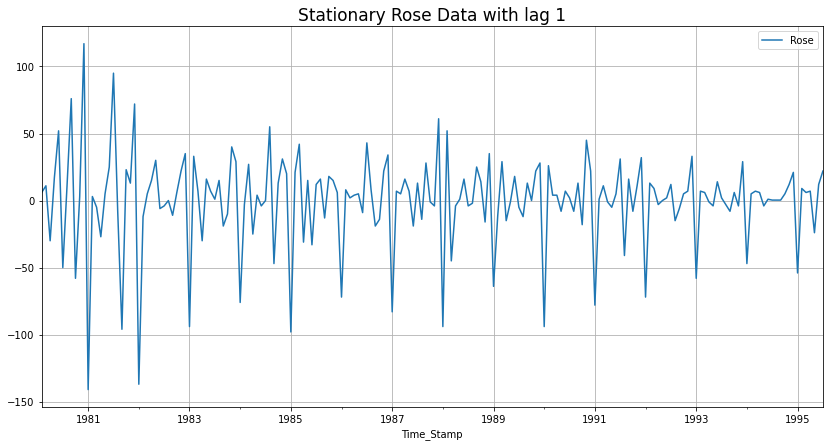

In [131]:
rose.diff().dropna().plot(grid=True);
plt.title('Stationary Rose Data with lag 1', fontsize=17);

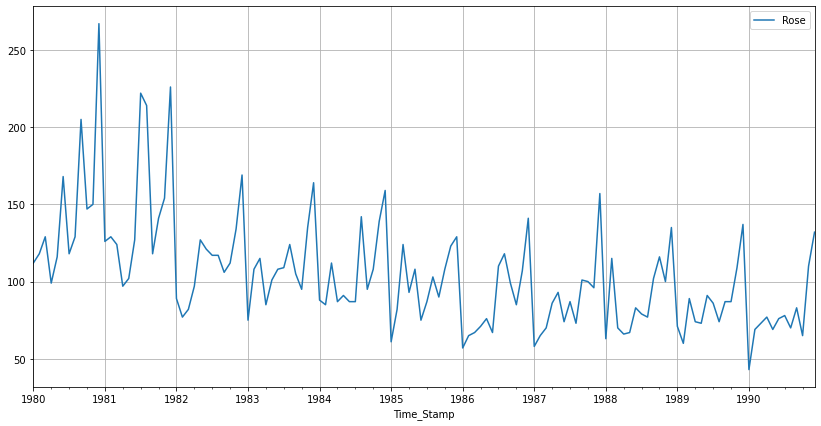

In [132]:
rtrain.plot(grid=True);

In [133]:
test_stationarity(rtrain['Rose'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [134]:
test_stationarity(rtrain['Rose'].diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



Text(0.5, 1.0, 'Stationary Train Rose Time Series')

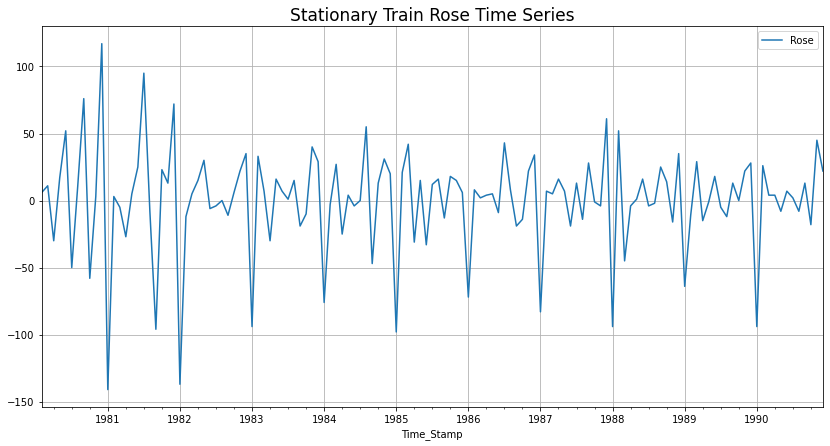

In [135]:
rtrain.diff().dropna().plot(grid=True);
plt.title('Stationary Train Rose Time Series', fontsize=17)

Rose ARIMA model

In [136]:
import itertools

p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))

print('Examples of the parameter combinations for the Model')

for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [137]:
# Creating an empty Dataframe with column names only
ROSE_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ROSE_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [138]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(rtrain['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535806
ARIMA(0, 1, 3) - AIC:1280.5453761734655
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380064
ARIMA(1, 1, 2) - AIC:1279.8707234231922
ARIMA(1, 1, 3) - AIC:1281.8707223309998
ARIMA(2, 1, 0) - AIC:1298.6110341605004
ARIMA(2, 1, 1) - AIC:1281.5078621868543
ARIMA(2, 1, 2) - AIC:1281.8707222264356


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1274.6954123405285
ARIMA(3, 1, 0) - AIC:1297.4810917271739
ARIMA(3, 1, 1) - AIC:1282.4192776271989
ARIMA(3, 1, 2) - AIC:1283.720740597716
ARIMA(3, 1, 3) - AIC:1278.6679167115944


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [139]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ROSE_ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
11  (2, 1, 3)  1274.695412
15  (3, 1, 3)  1278.667917
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376

In [140]:
auto_ARIMA = ARIMA(rtrain, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 17 Apr 2022   AIC                           1274.695
Time:                        17:57:18   BIC                           1291.947
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6783      0.084    -19.999      0.000      -1.843      -1.514
ar.L2         -0.7291      0.084     -8.687      0.000      -0.894      -0.565
ma.L1          1.0446      0.618      1.691      0.0

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


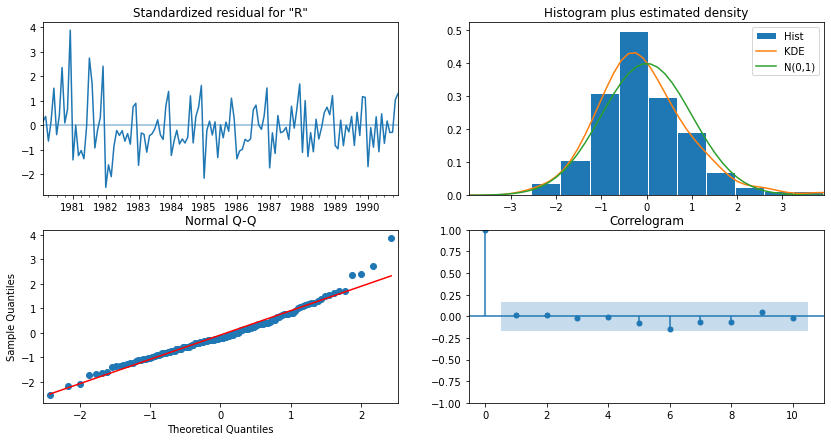

In [141]:
results_auto_ARIMA.plot_diagnostics();


In [142]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(rtest))
predicted_auto_ARIMA

1991-01-31    85.595789
1991-02-28    90.535998
1991-03-31    81.967217
1991-04-30    92.746555
1991-05-31    80.902653
1991-06-30    92.921603
1991-07-31    81.384994
1991-08-31    91.984470
1991-09-30    82.606135
1991-10-31    90.618245
1991-11-30    84.008799
1991-12-31    89.260200
1992-01-31    85.265393
1992-02-29    88.141340
1992-03-31    86.227055
1992-04-30    87.343088
1992-05-31    86.865662
1992-06-30    86.853281
1992-07-31    87.222129
1992-08-31    86.612116
1992-09-30    87.366993
1992-10-31    86.544813
1992-11-30    87.374335
1992-12-31    86.581558
1993-01-31    87.307312
1993-02-28    86.667253
1993-03-31    87.212353
1993-04-30    86.764147
1993-05-31    87.118966
1993-06-30    86.850238
1993-07-31    87.042563
1993-08-31    86.915700
1993-09-30    86.988399
1993-10-31    86.958878
1993-11-30    86.955422
1993-12-31    86.982745
1994-01-31    86.939409
1994-02-28    86.992220
1994-03-31    86.935181
1994-04-30    86.992408
1994-05-31    86.937948
1994-06-30    86

In [143]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE


In [144]:
rmse = mse(rtest['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.812983948773486 
MAPE: 75.83899089518297


In [145]:
resultsDf_8 = pd.DataFrame({'Rose Test RMSE': [rmse],'Rose Test MAPE':mape},index=['ARIMA(2, 1, 3)'])
resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf_8

Rose Test RMSE  Rose Test MAPE
ARIMA(2, 1, 3)       36.812984       75.838991

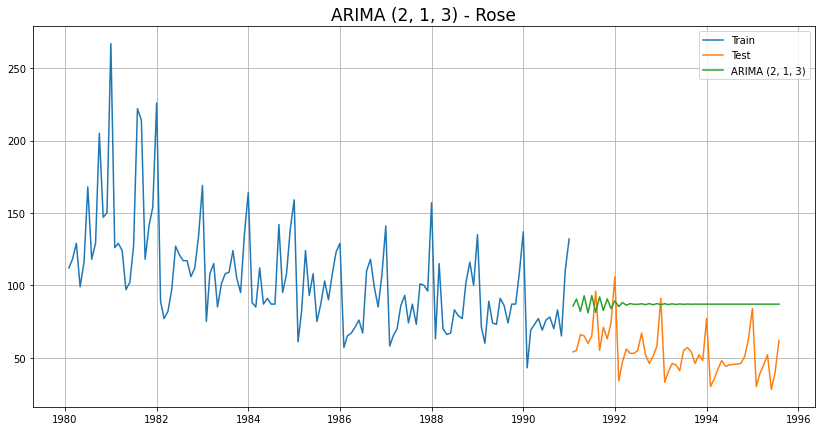

In [146]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
plt.plot(predicted_auto_ARIMA,label='ARIMA (2, 1, 3)')


plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2, 1, 3) - Rose', fontsize=17);

In [147]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Text(0.5, 1.0, 'Rose Training Data Autocorrelation')

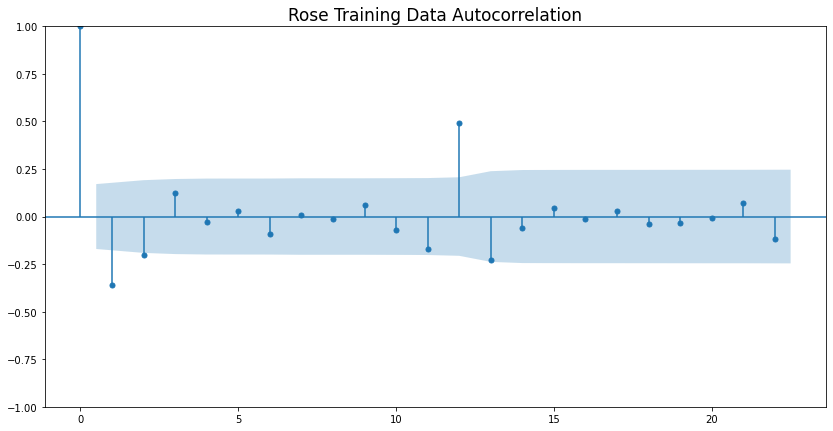

In [148]:
plot_acf(rtrain.diff(), missing='drop', alpha=0.05)
plt.title('Rose Training Data Autocorrelation',fontsize=17)

Text(0.5, 1.0, 'Rose Training Data Partial Autocorrelation')

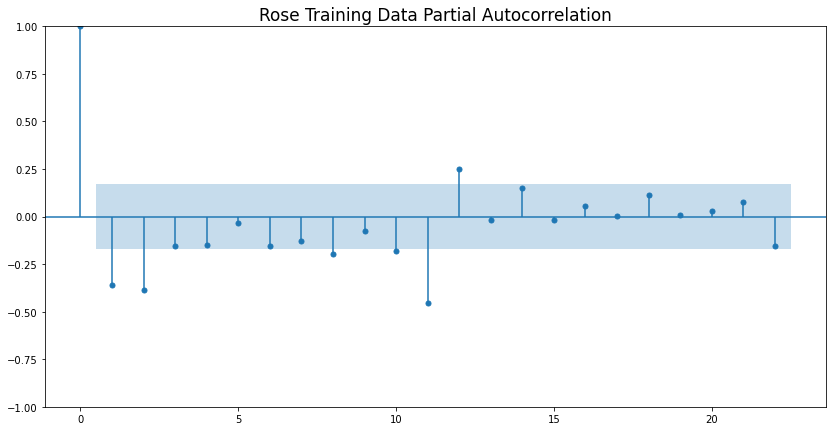

In [149]:
plot_pacf(rtrain.diff().dropna(), alpha=0.05)
plt.title('Rose Training Data Partial Autocorrelation',fontsize=17)

In [150]:
manual_ARIMA = ARIMA(rtrain['Rose'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 17 Apr 2022   AIC                           1281.871
Time:                        17:57:21   BIC                           1296.247
Sample:                    01-31-1980   HQIC                          1287.712
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

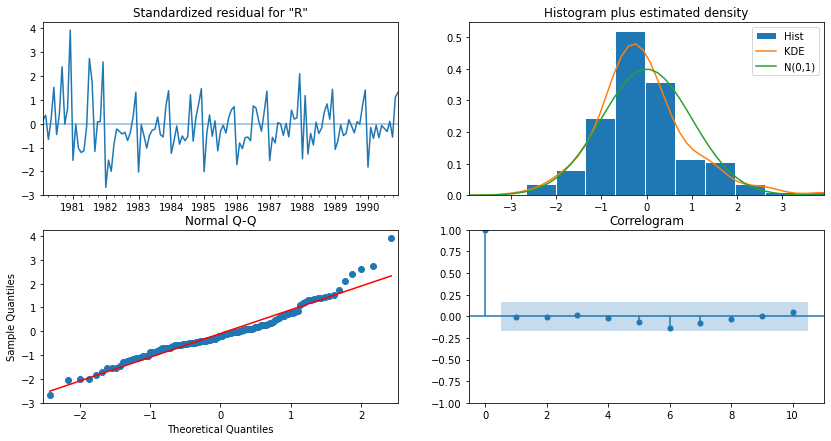

In [151]:
results_manual_ARIMA.plot_diagnostics();

In [152]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(rtest))

In [153]:
rmse = mse(rtest['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.87119662052946 
MAPE: 76.05621271971843


In [154]:
resultsDf_8 = pd.DataFrame({'Rose Test RMSE': [rmse],'Rose Test MAPE':mape},index=['ARIMA(2, 1, 2)'])
resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

Sparkling Test RMSE  Sparkling-Alpha  \
RegressionOnTime                        1389.135175              NaN   
NaiveModel                              3864.279352              NaN   
AverageModel                            1275.081804              NaN   
2pointTrailingMovingAverage              813.400684              NaN   
4pointTrailingMovingAverage             1156.589694              NaN   
6pointTrailingMovingAverage             1283.927428              NaN   
9pointTrailingMovingAverage             1346.278315              NaN   
Simple Exponential Smoothening          1338.008384          0.07029   
Holt's Model                            5291.879833          0.66500   
Holt's Winter Model                      404.286809          0.11134   
ARIMA(2, 1, 3)                                  NaN              NaN   
ARIMA(2, 1, 2)                                  NaN              NaN   

                                Sparkling-Beta  Sparkling-Gamma  \
RegressionOnTime                           NaN              NaN   
NaiveModel                                 NaN              NaN   
AverageModel                               NaN              NaN   
2pointTrailingMovingAverage                NaN              NaN   
4pointTrailingMovingAverage                NaN              NaN   
6pointTrailingMovingAverage                NaN              NaN   
9pointTrailingMovingAverage                NaN              NaN   
Simple Exponential Smoothening             NaN              NaN   
Holt's Model                           0.00010              NaN   
Holt's Winter Model                    0.04951          0.36208   
ARIMA(2, 1, 3)                             NaN              NaN   
ARIMA(2, 1, 2)                             NaN              NaN   

                                Rose Test RMSE Rose-Alpha Rose-Beta  \
RegressionOnTime                     15.268955        NaN       NaN   
NaiveModel                           79.718773        NaN       NaN   
AverageModel                         53.460570        NaN       NaN   
2pointTrailingMovingAverage          11.529278        NaN       NaN   
4pointTrailingMovingAverage          14.451403        NaN       NaN   
6pointTrailingMovingAverage          14.566327        NaN       NaN   
9pointTrailingMovingAverage          14.727630        NaN       NaN   
Simple Exponential Smoothening       36.796241    0.09875       NaN   
Holt's Model                         15.268944   1.49e-08  1.66e-10   
Holt's Winter Model                  15.268944    0.07151   0.04529   
ARIMA(2, 1, 3)                       36.812984        NaN       NaN   
ARIMA(2, 1, 2)                       36.871197        NaN       NaN   

                                Rose-Gamma  Rose Test MAPE  
RegressionOnTime                       NaN             NaN  
NaiveModel                             NaN             NaN  
AverageModel                           NaN             NaN  
2pointTrailingMovingAverage            NaN             NaN  
4pointTrailingMovingAverage            NaN             NaN  
6pointTrailingMovingAverage            NaN             NaN  
9pointTrailingMovingAverage            NaN             NaN  
Simple Exponential Smoothening         NaN             NaN  
Holt's Model                           NaN             NaN  
Holt's Winter Model               0.000072             NaN  
ARIMA(2, 1, 3)                         NaN       75.838991  
ARIMA(2, 1, 2)                         NaN       76.056213

Text(0.5, 1.0, 'ARIMA (2, 1, 2) Forecast - Rose')

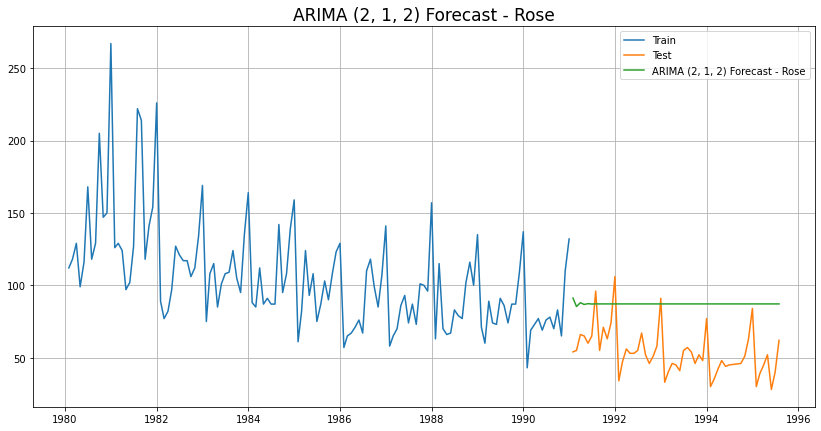

In [155]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(predicted_manual_ARIMA, label = 'ARIMA (2, 1, 2) Forecast - Rose')
plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (2, 1, 2) Forecast - Rose', fontsize=17)

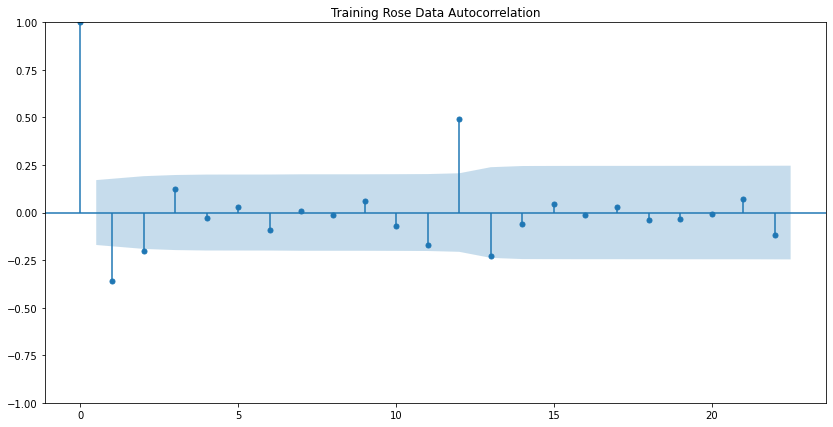

In [156]:
plot_acf(rtrain.diff(),title='Training Rose Data Autocorrelation',missing='drop');

In [157]:
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [158]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [159]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207175
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380894


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:5718.421796606624
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386002
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753448
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3923.111981743881
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697546
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945653


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3735.47970250528
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.753540393109
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.748270265051
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136127558


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3463.5988181011626
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918339
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.631404938387


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:5697.443976122974
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491795
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094548
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483293343


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3779.901223324475
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536075
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461666
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988256216015


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3709.9417322302766
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:798.588976478365
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:800.484493162141
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:801.0595269379617


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3695.7078636456276
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.667543054104
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975264913
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617699


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:5274.882125362548
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843413673
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.540093355627
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913581822


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:2500.5105450231245
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257978
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545034652
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085679584


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:2563.981616133711
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:800.1020189375205
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:801.9941080533189
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:802.520652826136


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:2666.3931438665522
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1243.9501216739152
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1076.7632646079987
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:905.6926533380713


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:5125.203630829177
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1089.2051361212232
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1034.8411212936157
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:896.8362523340468
SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3804.225429137994
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:914.9477108987096
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:916.0630996896724
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:880.5509788249415


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3605.2986576627577
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:802.0987124771223
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:803.9928772338811
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:804.5150752298563


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3642.462844594013
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.2955447585719
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.940539125769


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:5776.225563773753
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.886078680458
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.4080055024756
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972948193


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3611.083522911877
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778664119
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661067
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103071328


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3544.9005448954404
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:819.3931032272586
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:821.1501371573468
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:819.1305086833714


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3530.49919829007
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255505
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.317270864085
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.086222406386


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:5143.155178182782
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965032806
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547135129
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428503279
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3885.4831308765374
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.924906084468
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470745
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.672579593691
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3815.529185431417
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:789.2360439386802
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:790.9603447855586
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:790.811385029159
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3801.305225834893
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.9495040706236
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1085.4861928100865
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.493840271503


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:5691.958795261579
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.7760922493494
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.6183220083724
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318500508657


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3771.2890404795453
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.1690197403764
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597827986624
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:889.902849369327


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3701.427574717762
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:791.007380246502
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:792.6312805560863
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:792.1390249251345


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3688.8329148727094
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1245.5463125316496
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1072.984973917893
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:907.4130105124817


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:5542.087568167045
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1082.3281487676177
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1036.1950927105722
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:897.5232291501883


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:2675.583928286201
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:908.2687609711808
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:909.7955658842624
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:880.2886590070266
SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3612.6634118577945
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:792.9903135001575
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:794.6310140930992
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:794.0467947378354


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2802.1057393772394
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.253756153577
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.777370471139
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.079320882996


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:5765.765302128545
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.5086021575974
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.786319864115
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165558947
SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3925.340480882403
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645396
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801384721
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280806
SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3856.384337921692
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:806.053640740921
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:808.0472637903399
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:806.4988191372294


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:4036.928628093844
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.2315231797984
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.2093491949367
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472071411


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:5766.882547119737
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.4249601101342
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.9244471204804
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822729
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3887.483130874628
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608119215
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.639956536955
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866286772


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3023.3509150271693
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.393260025772
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639259064494
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.0598886524745


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3778.082117738038
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.9102116146685
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.964355259821
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311108079


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:5693.447859540391
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713704332
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909354771824
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488809099


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3544.171182936432
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464441348852
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781889114674
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687981961567


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3363.247345298559
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:785.1199712451123
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:786.9410035240284
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:786.9640482420575


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3448.586951281936
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1237.8700952681038
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1067.8073335028844
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:908.3349329441934


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:5543.753223984078
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1073.2563236091426
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.046196912473
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:890.9483346398198


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3791.940434772261
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:893.3579301555346
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:903.2328123179304
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:879.2191801415338


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3712.1478947283126
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:782.407420812777
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:783.4101471700199
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:781.0452503916601


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3682.321753088024
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1269.8130062641503
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1119.1703158042212
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:953.3440589118005
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:5766.362730374765
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1080.546845672638
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1065.5569726783845
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:943.686599630471
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3929.1119817438826
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:909.7203197914127
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.0620713976507
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.043881647289
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3858.38433791898
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:796.0564701527213
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410167662588
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.6677017225135


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3663.4959139908783
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1255.0658180709434
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1095.6894641212364
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:923.8872427547116


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:5911.805300015063
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1064.61491365135
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1046.0837553975168
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:917.0308009384298
SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3889.4831308745534
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:887.320445989856
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:888.327920853833
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:890.1571523267522


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3515.384216943545
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:775.4266990286204
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:775.4953300778068
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:774.4002852238873


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3915.3936297312184
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1255.9835652484905
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1086.7092401266596
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:917.7980111823309


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3755.5226470983303
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1066.2776211372457
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1046.1260532411327
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:909.2875105233226


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:4032.940587702241
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:889.3182497694606
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.3277441364618
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.1431082346437


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:4711.656428387589
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:777.2505640849973
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:776.3462137736811
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:774.8809344347368
SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3912.7267296416185
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1243.7385827869794
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1060.53976435309
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:910.33401583708


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:5616.149196632079
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1066.8458967463102
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.7662380406678
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:900.0483664933341


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3543.040328958739
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:884.0463711763861
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:885.9217100767557
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:880.5595714977788


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3695.3866332522175
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:775.5610184909056
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:776.3690408935078
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:778.2316168676531
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3680.734077317536


In [160]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

param       seasonal         AIC
222  (3, 1, 1)  (3, 0, 2, 12)  774.400285
238  (3, 1, 2)  (3, 0, 2, 12)  774.880934
220  (3, 1, 1)  (3, 0, 0, 12)  775.426699
221  (3, 1, 1)  (3, 0, 1, 12)  775.495330
252  (3, 1, 3)  (3, 0, 0, 12)  775.561018

In [161]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sun, 17 Apr 2022   AIC                            774.400
Time:                                         18:02:56   BIC                            799.618
Sample:                                     01-31-1980   HQIC                           784.578
                                          - 12-31-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.202       0

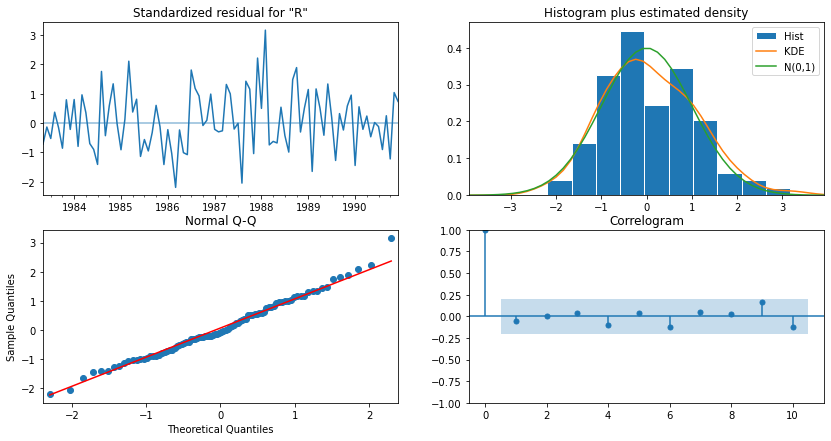

In [162]:
results_auto_SARIMA.plot_diagnostics();

In [163]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(rtest))
predicted_auto_SARIMA1= results_auto_SARIMA.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=False)

In [164]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  55.235168  13.907696      27.976585      82.493751
1991-02-28  68.122949  13.991137      40.700825      95.545073
1991-03-31  67.908680  14.012187      40.445299      95.372062
1991-04-30  66.786167  14.099497      39.151660      94.420673
1991-05-31  69.760116  14.108856      42.107266      97.412965

In [165]:
rmse = mse(rtest['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)


RMSE: 18.881909633560873 
MAPE: 36.37542818554386


In [166]:
resultsDf_8 = pd.DataFrame({'Rose Test RMSE': [rmse],'Rose Test MAPE':mape},index=['SARIMA(3, 1, 1)(3, 0, 2, 12)'])
resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf



Sparkling Test RMSE  Sparkling-Alpha  \
RegressionOnTime                        1389.135175              NaN   
NaiveModel                              3864.279352              NaN   
AverageModel                            1275.081804              NaN   
2pointTrailingMovingAverage              813.400684              NaN   
4pointTrailingMovingAverage             1156.589694              NaN   
6pointTrailingMovingAverage             1283.927428              NaN   
9pointTrailingMovingAverage             1346.278315              NaN   
Simple Exponential Smoothening          1338.008384          0.07029   
Holt's Model                            5291.879833          0.66500   
Holt's Winter Model                      404.286809          0.11134   
ARIMA(2, 1, 3)                                  NaN              NaN   
ARIMA(2, 1, 2)                                  NaN              NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)                    NaN              NaN   

                                Sparkling-Beta  Sparkling-Gamma  \
RegressionOnTime                           NaN              NaN   
NaiveModel                                 NaN              NaN   
AverageModel                               NaN              NaN   
2pointTrailingMovingAverage                NaN              NaN   
4pointTrailingMovingAverage                NaN              NaN   
6pointTrailingMovingAverage                NaN              NaN   
9pointTrailingMovingAverage                NaN              NaN   
Simple Exponential Smoothening             NaN              NaN   
Holt's Model                           0.00010              NaN   
Holt's Winter Model                    0.04951          0.36208   
ARIMA(2, 1, 3)                             NaN              NaN   
ARIMA(2, 1, 2)                             NaN              NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)               NaN              NaN   

                                Rose Test RMSE Rose-Alpha Rose-Beta  \
RegressionOnTime                     15.268955        NaN       NaN   
NaiveModel                           79.718773        NaN       NaN   
AverageModel                         53.460570        NaN       NaN   
2pointTrailingMovingAverage          11.529278        NaN       NaN   
4pointTrailingMovingAverage          14.451403        NaN       NaN   
6pointTrailingMovingAverage          14.566327        NaN       NaN   
9pointTrailingMovingAverage          14.727630        NaN       NaN   
Simple Exponential Smoothening       36.796241    0.09875       NaN   
Holt's Model                         15.268944   1.49e-08  1.66e-10   
Holt's Winter Model                  15.268944    0.07151   0.04529   
ARIMA(2, 1, 3)                       36.812984        NaN       NaN   
ARIMA(2, 1, 2)                       36.871197        NaN       NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)         18.881910        NaN       NaN   

                                Rose-Gamma  Rose Test MAPE  
RegressionOnTime                       NaN             NaN  
NaiveModel                             NaN             NaN  
AverageModel                           NaN             NaN  
2pointTrailingMovingAverage            NaN             NaN  
4pointTrailingMovingAverage            NaN             NaN  
6pointTrailingMovingAverage            NaN             NaN  
9pointTrailingMovingAverage            NaN             NaN  
Simple Exponential Smoothening         NaN             NaN  
Holt's Model                           NaN             NaN  
Holt's Winter Model               0.000072             NaN  
ARIMA(2, 1, 3)                         NaN       75.838991  
ARIMA(2, 1, 2)                         NaN       76.056213  
SARIMA(3, 1, 1)(3, 0, 2, 12)           NaN       36.375428

In [167]:
resultsR0 = resultsDf_8.copy()

resultsR0

Rose Test RMSE  Rose Test MAPE
SARIMA(3, 1, 1)(3, 0, 2, 12)        18.88191       36.375428

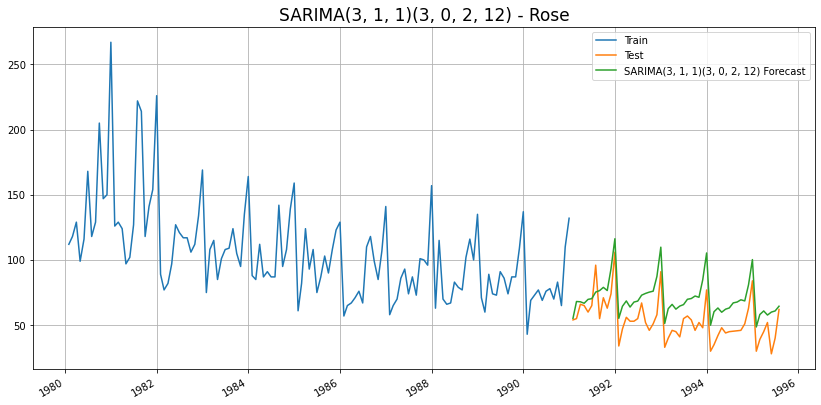

In [168]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA(3, 1, 1)(3, 0, 2, 12) - Rose', fontsize=17);

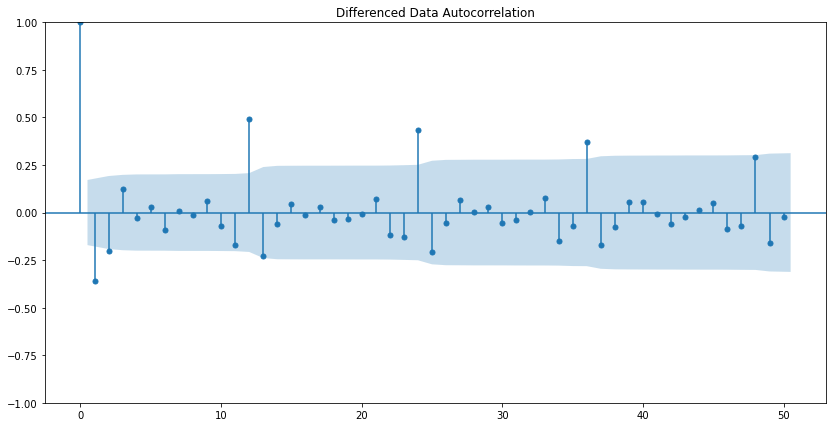

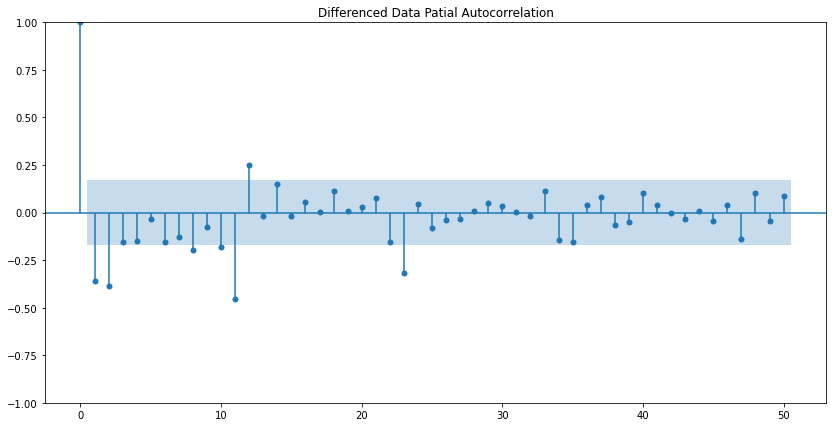

In [169]:
plot_acf(rtrain['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(rtrain['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

In [170]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -379.498
Date:                            Sun, 17 Apr 2022   AIC                            776.996
Time:                                    18:03:02   BIC                            799.692
Sample:                                01-31-1980   HQIC                           786.156
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8551      0.146     -5.838      0.000      -1.142      -0.568
ar.L2         -0.0022      0.125   

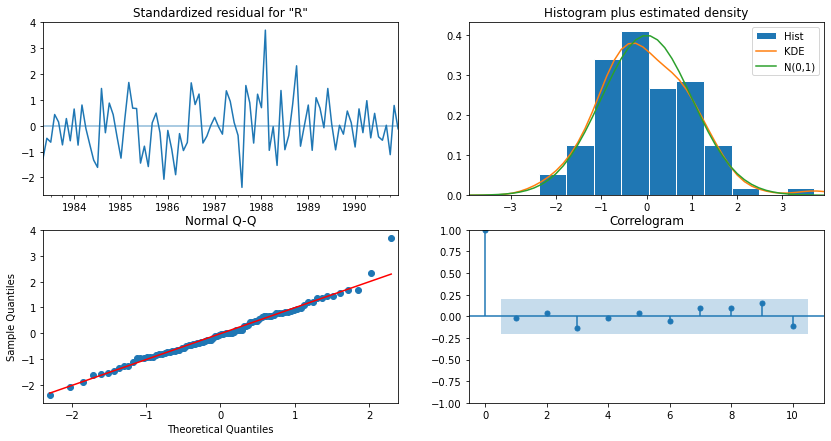

In [171]:
results_manual_SARIMA.plot_diagnostics();

In [172]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(rtest))
                                                             
#predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(rtest))

In [173]:
rmse = mse(rtest['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 16.550894375564567 
MAPE: 25.47753761782553


In [174]:
resultsDf_8 = pd.DataFrame({'Rose Test RMSE': [rmse],'Rose Test MAPE':mape},index=['SARIMA(2, 1, 2)(2, 1, 2, 12)'])
resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf


Sparkling Test RMSE  Sparkling-Alpha  \
RegressionOnTime                        1389.135175              NaN   
NaiveModel                              3864.279352              NaN   
AverageModel                            1275.081804              NaN   
2pointTrailingMovingAverage              813.400684              NaN   
4pointTrailingMovingAverage             1156.589694              NaN   
6pointTrailingMovingAverage             1283.927428              NaN   
9pointTrailingMovingAverage             1346.278315              NaN   
Simple Exponential Smoothening          1338.008384          0.07029   
Holt's Model                            5291.879833          0.66500   
Holt's Winter Model                      404.286809          0.11134   
ARIMA(2, 1, 3)                                  NaN              NaN   
ARIMA(2, 1, 2)                                  NaN              NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)                    NaN              NaN   
SARIMA(2, 1, 2)(2, 1, 2, 12)                    NaN              NaN   

                                Sparkling-Beta  Sparkling-Gamma  \
RegressionOnTime                           NaN              NaN   
NaiveModel                                 NaN              NaN   
AverageModel                               NaN              NaN   
2pointTrailingMovingAverage                NaN              NaN   
4pointTrailingMovingAverage                NaN              NaN   
6pointTrailingMovingAverage                NaN              NaN   
9pointTrailingMovingAverage                NaN              NaN   
Simple Exponential Smoothening             NaN              NaN   
Holt's Model                           0.00010              NaN   
Holt's Winter Model                    0.04951          0.36208   
ARIMA(2, 1, 3)                             NaN              NaN   
ARIMA(2, 1, 2)                             NaN              NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)               NaN              NaN   
SARIMA(2, 1, 2)(2, 1, 2, 12)               NaN              NaN   

                                Rose Test RMSE Rose-Alpha Rose-Beta  \
RegressionOnTime                     15.268955        NaN       NaN   
NaiveModel                           79.718773        NaN       NaN   
AverageModel                         53.460570        NaN       NaN   
2pointTrailingMovingAverage          11.529278        NaN       NaN   
4pointTrailingMovingAverage          14.451403        NaN       NaN   
6pointTrailingMovingAverage          14.566327        NaN       NaN   
9pointTrailingMovingAverage          14.727630        NaN       NaN   
Simple Exponential Smoothening       36.796241    0.09875       NaN   
Holt's Model                         15.268944   1.49e-08  1.66e-10   
Holt's Winter Model                  15.268944    0.07151   0.04529   
ARIMA(2, 1, 3)                       36.812984        NaN       NaN   
ARIMA(2, 1, 2)                       36.871197        NaN       NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)         18.881910        NaN       NaN   
SARIMA(2, 1, 2)(2, 1, 2, 12)         16.550894        NaN       NaN   

                                Rose-Gamma  Rose Test MAPE  
RegressionOnTime                       NaN             NaN  
NaiveModel                             NaN             NaN  
AverageModel                           NaN             NaN  
2pointTrailingMovingAverage            NaN             NaN  
4pointTrailingMovingAverage            NaN             NaN  
6pointTrailingMovingAverage            NaN             NaN  
9pointTrailingMovingAverage            NaN             NaN  
Simple Exponential Smoothening         NaN             NaN  
Holt's Model                           NaN             NaN  
Holt's Winter Model               0.000072             NaN  
ARIMA(2, 1, 3)                         NaN       75.838991  
ARIMA(2, 1, 2)                         NaN       76.056213  
SARIMA(3, 1, 1)(3, 0, 2, 12)           NaN       36.375428  
SARIMA(2, 1, 2)(2, 1, 2, 

In [175]:
resultsR0 = resultsDf_8.copy()

Text(0.5, 1.0, 'SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE')

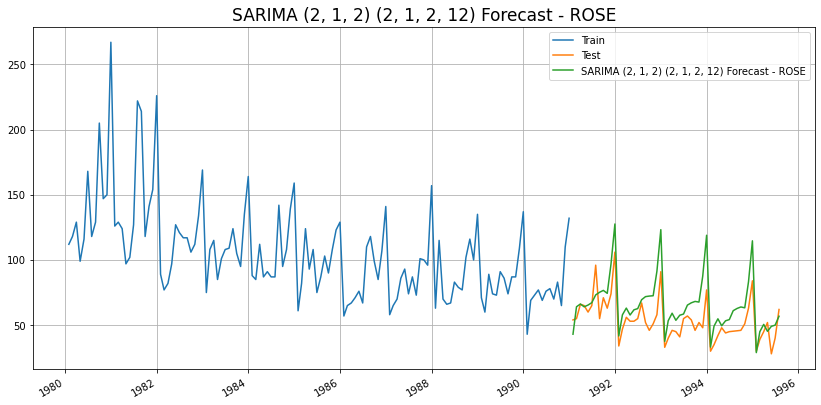

In [176]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE', fontsize=17)

In [177]:
full_data_model = sm.tsa.statespace.SARIMAX(rose['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -587.531
Date:                            Sun, 17 Apr 2022   AIC                           1193.062
Time:                                    18:03:07   BIC                           1219.976
Sample:                                01-31-1980   HQIC                          1203.997
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8649      0.101     -8.559      0.000      -1.063      -0.667
ar.L2          0.0340      0.091   

In [178]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [179]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  43.083658  12.674047      18.242983      67.924333
1995-09-30  43.341993  12.959866      17.941122      68.742864
1995-10-31  45.827548  12.963865      20.418839      71.236258
1995-11-30  57.397321  13.124632      31.673516      83.121126
1995-12-31  85.074835  13.133466      59.333714     110.815955

In [180]:
rmse = mse(rose['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 35.91110673976319


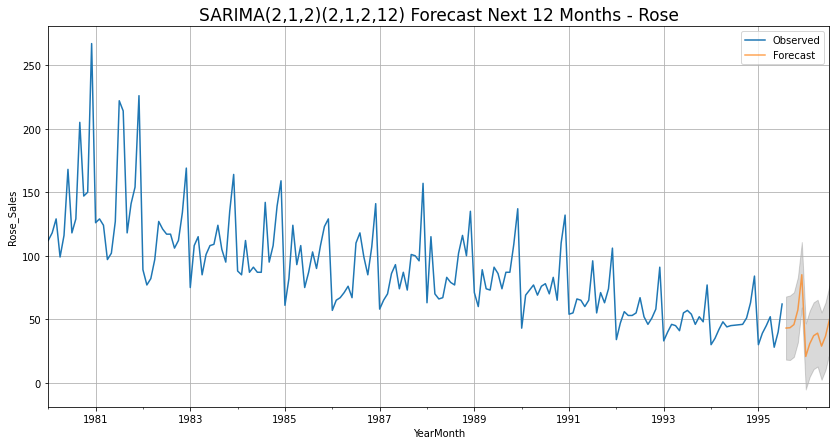

In [181]:

# plot the forecast along with the confidence band

axis = rose['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose', fontsize=17);
plt.show()

# Arima/Sarima for Sparkling dataset

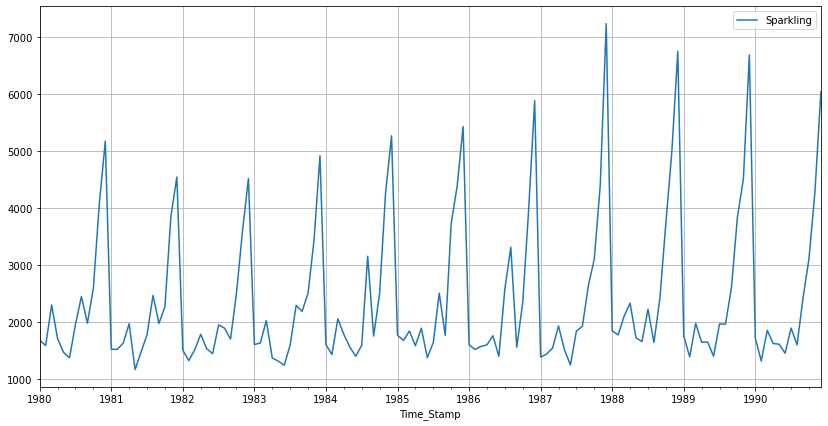

In [182]:
strain.plot(grid=True);

In [183]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [184]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [185]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(strain['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323131676
ARIMA(0, 1, 3) - AIC:2233.9948577793975
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.755094673383
ARIMA(1, 1, 2) - AIC:2234.5272004508324
ARIMA(1, 1, 3) - AIC:2235.6078073353247
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.7776263084434
ARIMA(2, 1, 2) - AIC:2213.5092122831566


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.9370761971877
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.498924009065


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2230.952332594816
ARIMA(3, 1, 3) - AIC:2221.458954306803


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [186]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
10  (2, 1, 2)  2213.509212
15  (3, 1, 3)  2221.458954
14  (3, 1, 2)  2230.952333
11  (2, 1, 3)  2232.937076
9   (2, 1, 1)  2233.777626

In [187]:
auto_ARIMA = ARIMA(strain, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 17 Apr 2022   AIC                           2213.509
Time:                        18:03:12   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.218      0.0

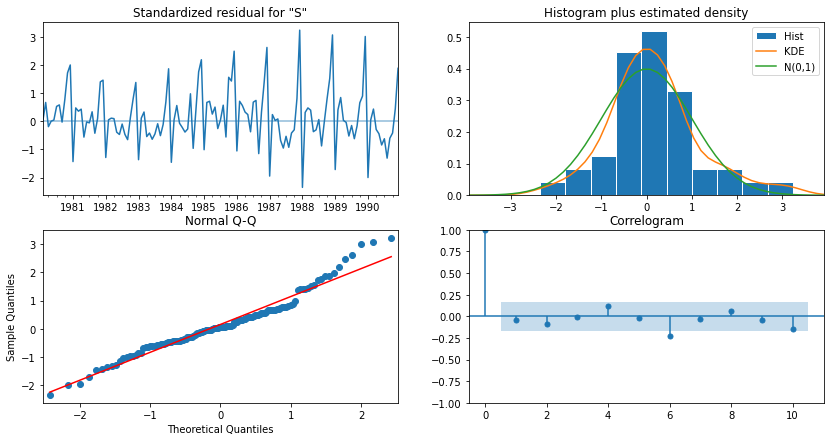

In [188]:
results_auto_ARIMA.plot_diagnostics();

In [189]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(stest))

In [190]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE


In [191]:
rmse = mse(stest['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1299.9796397916396 
MAPE: 47.09998646565863


In [192]:
resultsDf_9 = pd.DataFrame({'Sparkling Test RMSE': [rmse],'Sparkling Test MAPE':mape},index=['ARIMA(2, 1, 2)'])
resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf


Sparkling Test RMSE  Sparkling-Alpha  \
RegressionOnTime                        1389.135175              NaN   
NaiveModel                              3864.279352              NaN   
AverageModel                            1275.081804              NaN   
2pointTrailingMovingAverage              813.400684              NaN   
4pointTrailingMovingAverage             1156.589694              NaN   
6pointTrailingMovingAverage             1283.927428              NaN   
9pointTrailingMovingAverage             1346.278315              NaN   
Simple Exponential Smoothening          1338.008384          0.07029   
Holt's Model                            5291.879833          0.66500   
Holt's Winter Model                      404.286809          0.11134   
ARIMA(2, 1, 3)                                  NaN              NaN   
ARIMA(2, 1, 2)                                  NaN              NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)                    NaN              NaN   
SARIMA(2, 1, 2)(2, 1, 2, 12)                    NaN              NaN   
ARIMA(2, 1, 2)                          1299.979640              NaN   

                                Sparkling-Beta  Sparkling-Gamma  \
RegressionOnTime                           NaN              NaN   
NaiveModel                                 NaN              NaN   
AverageModel                               NaN              NaN   
2pointTrailingMovingAverage                NaN              NaN   
4pointTrailingMovingAverage                NaN              NaN   
6pointTrailingMovingAverage                NaN              NaN   
9pointTrailingMovingAverage                NaN              NaN   
Simple Exponential Smoothening             NaN              NaN   
Holt's Model                           0.00010              NaN   
Holt's Winter Model                    0.04951          0.36208   
ARIMA(2, 1, 3)                             NaN              NaN   
ARIMA(2, 1, 2)                             NaN              NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)               NaN              NaN   
SARIMA(2, 1, 2)(2, 1, 2, 12)               NaN              NaN   
ARIMA(2, 1, 2)                             NaN              NaN   

                                Rose Test RMSE Rose-Alpha Rose-Beta  \
RegressionOnTime                     15.268955        NaN       NaN   
NaiveModel                           79.718773        NaN       NaN   
AverageModel                         53.460570        NaN       NaN   
2pointTrailingMovingAverage          11.529278        NaN       NaN   
4pointTrailingMovingAverage          14.451403        NaN       NaN   
6pointTrailingMovingAverage          14.566327        NaN       NaN   
9pointTrailingMovingAverage          14.727630        NaN       NaN   
Simple Exponential Smoothening       36.796241    0.09875       NaN   
Holt's Model                         15.268944   1.49e-08  1.66e-10   
Holt's Winter Model                  15.268944    0.07151   0.04529   
ARIMA(2, 1, 3)                       36.812984        NaN       NaN   
ARIMA(2, 1, 2)                       36.871197        NaN       NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)         18.881910        NaN       NaN   
SARIMA(2, 1, 2)(2, 1, 2, 12)         16.550894        NaN       NaN   
ARIMA(2, 1, 2)                             NaN        NaN       NaN   

                                Rose-Gamma  Rose Test MAPE  \
RegressionOnTime                       NaN             NaN   
NaiveModel                             NaN             NaN   
AverageModel                           NaN             NaN   
2pointTrailingMovingAverage            NaN             NaN   
4pointTrailingMovingAverage            NaN             NaN   
6pointTrailingMovingAverage            NaN             NaN   
9pointTrailingMovingAverage            NaN             NaN   
Simple Exponential Smoothening         NaN             NaN   
Holt's Model                           NaN             NaN   
Holt's Winter Model               0.000072       

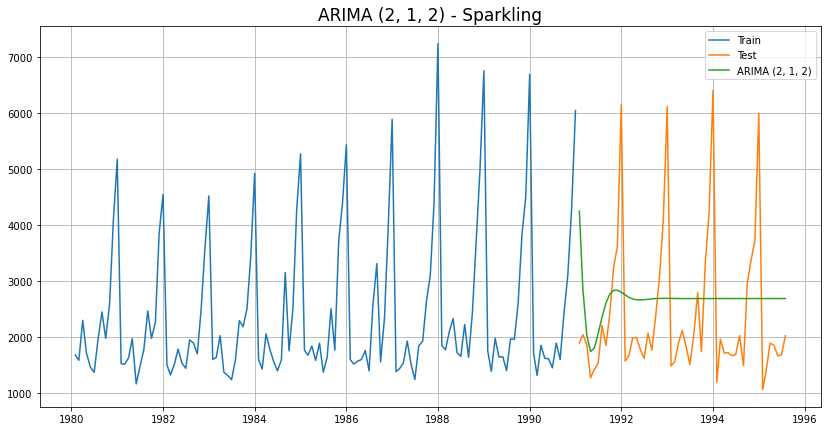

In [193]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_auto_ARIMA, label='ARIMA (2, 1, 2)')

plt.title('ARIMA (2, 1, 2) - Sparkling', fontsize=17)
plt.grid()
plt.legend(loc='best')

Text(0.5, 1.0, 'Sparkling Training Data Autocorrelation')

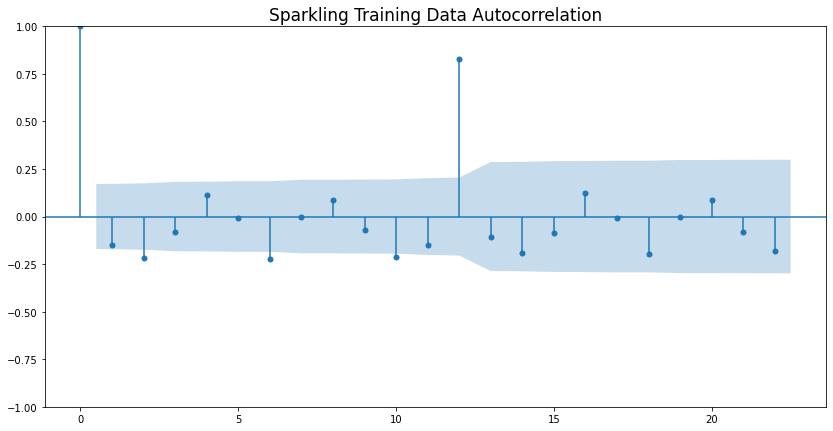

In [194]:
plot_acf(strain.diff(),missing='drop')
plt.title('Sparkling Training Data Autocorrelation', fontsize=17)

Text(0.5, 1.0, 'Sparkling Training Data Partial Autocorrelation')

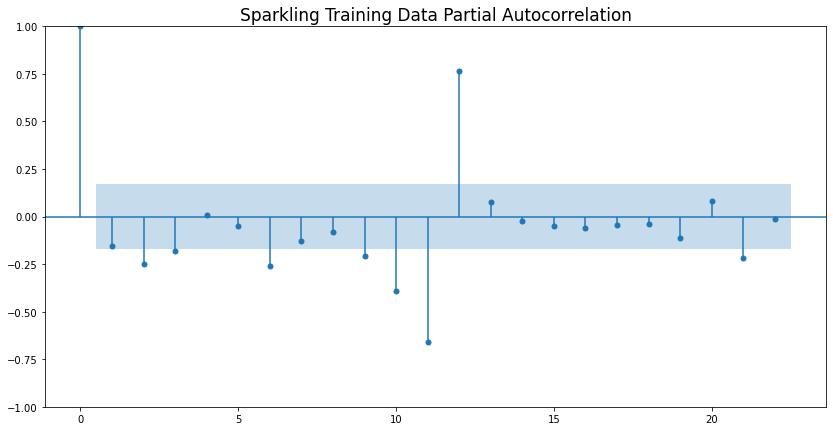

In [195]:
plot_pacf(strain.diff().dropna(),title='Training Data Partial Autocorrelation')
plt.title('Sparkling Training Data Partial Autocorrelation', fontsize=17)

In [196]:
manual_ARIMA = ARIMA(strain['Sparkling'], order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sun, 17 Apr 2022   AIC                           2267.663
Time:                        18:03:14   BIC                           2270.538
Sample:                    01-31-1980   HQIC                          2268.831
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


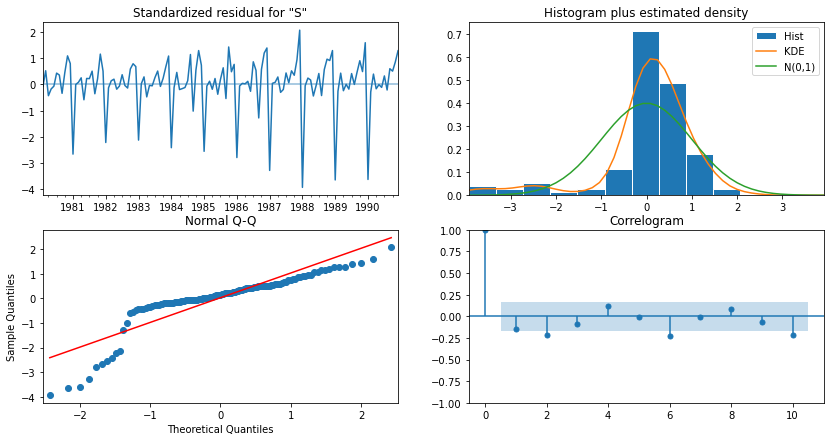

In [197]:
results_manual_ARIMA.plot_diagnostics();

In [198]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(stest))

In [199]:
rmse = mse(stest['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 3864.2793518443914 
MAPE: 201.32764950352743


In [200]:
resultsDf_9 = pd.DataFrame({'Sparkling Test RMSE': [rmse],'Sparkling Test MAPE':mape},index=['ARIMA(0, 1, 0)'])
resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

Sparkling Test RMSE  Sparkling-Alpha  \
RegressionOnTime                        1389.135175              NaN   
NaiveModel                              3864.279352              NaN   
AverageModel                            1275.081804              NaN   
2pointTrailingMovingAverage              813.400684              NaN   
4pointTrailingMovingAverage             1156.589694              NaN   
6pointTrailingMovingAverage             1283.927428              NaN   
9pointTrailingMovingAverage             1346.278315              NaN   
Simple Exponential Smoothening          1338.008384          0.07029   
Holt's Model                            5291.879833          0.66500   
Holt's Winter Model                      404.286809          0.11134   
ARIMA(2, 1, 3)                                  NaN              NaN   
ARIMA(2, 1, 2)                                  NaN              NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)                    NaN              NaN   
SARIMA(2, 1, 2)(2, 1, 2, 12)                    NaN              NaN   
ARIMA(2, 1, 2)                          1299.979640              NaN   
ARIMA(0, 1, 0)                          3864.279352              NaN   

                                Sparkling-Beta  Sparkling-Gamma  \
RegressionOnTime                           NaN              NaN   
NaiveModel                                 NaN              NaN   
AverageModel                               NaN              NaN   
2pointTrailingMovingAverage                NaN              NaN   
4pointTrailingMovingAverage                NaN              NaN   
6pointTrailingMovingAverage                NaN              NaN   
9pointTrailingMovingAverage                NaN              NaN   
Simple Exponential Smoothening             NaN              NaN   
Holt's Model                           0.00010              NaN   
Holt's Winter Model                    0.04951          0.36208   
ARIMA(2, 1, 3)                             NaN              NaN   
ARIMA(2, 1, 2)                             NaN              NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)               NaN              NaN   
SARIMA(2, 1, 2)(2, 1, 2, 12)               NaN              NaN   
ARIMA(2, 1, 2)                             NaN              NaN   
ARIMA(0, 1, 0)                             NaN              NaN   

                                Rose Test RMSE Rose-Alpha Rose-Beta  \
RegressionOnTime                     15.268955        NaN       NaN   
NaiveModel                           79.718773        NaN       NaN   
AverageModel                         53.460570        NaN       NaN   
2pointTrailingMovingAverage          11.529278        NaN       NaN   
4pointTrailingMovingAverage          14.451403        NaN       NaN   
6pointTrailingMovingAverage          14.566327        NaN       NaN   
9pointTrailingMovingAverage          14.727630        NaN       NaN   
Simple Exponential Smoothening       36.796241    0.09875       NaN   
Holt's Model                         15.268944   1.49e-08  1.66e-10   
Holt's Winter Model                  15.268944    0.07151   0.04529   
ARIMA(2, 1, 3)                       36.812984        NaN       NaN   
ARIMA(2, 1, 2)                       36.871197        NaN       NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)         18.881910        NaN       NaN   
SARIMA(2, 1, 2)(2, 1, 2, 12)         16.550894        NaN       NaN   
ARIMA(2, 1, 2)                             NaN        NaN       NaN   
ARIMA(0, 1, 0)                             NaN        NaN       NaN   

                                Rose-Gamma  Rose Test MAPE  \
RegressionOnTime                       NaN             NaN   
NaiveModel                             NaN             NaN   
AverageModel                           NaN             NaN   
2pointTrailingMovingAverage            NaN             NaN   
4pointTrailingMovingAverage            NaN             NaN   
6pointTrailingMovingAverage            NaN             NaN   
9pointTrailingMovingAvera

Text(0.5, 1.0, 'ARIMA (0, 1, 0) Forecast- Sparkling')

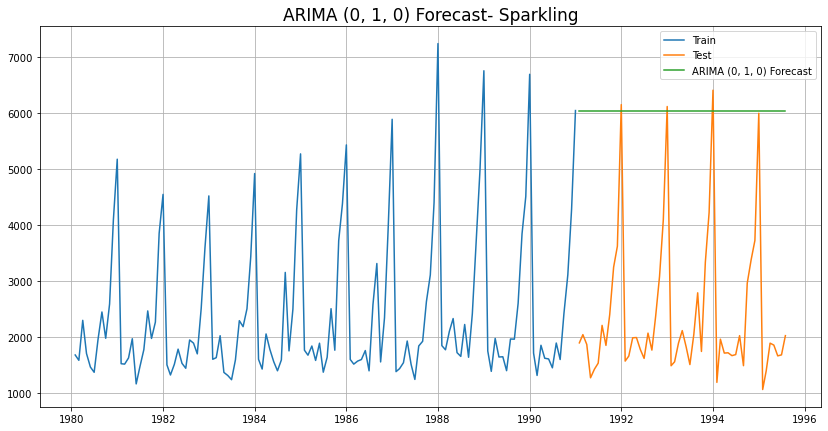

In [201]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_manual_ARIMA, label='ARIMA (0, 1, 0) Forecast')

plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (0, 1, 0) Forecast- Sparkling', fontsize=17)

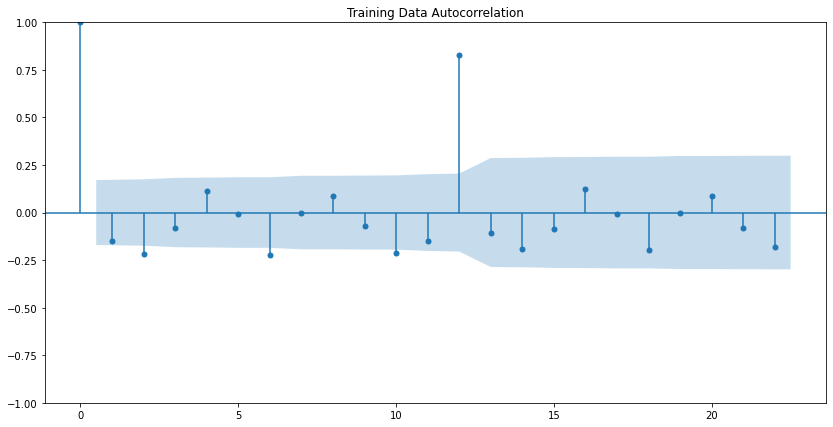

In [202]:
plot_acf(strain.diff(),title='Training Data Autocorrelation',missing='drop');

In [203]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [204]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [205]:

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(strain['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616842675
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236566
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:7441.156431906364
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389083
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791705


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3742.8762259298555
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158611443
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920801


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3758.958561092017
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308408
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625834
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530064452


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:2950.5228823053444
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505853
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.768864956687
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.708957288972
SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:7427.391419134551
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838032
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319373017
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319652484135


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3331.05595273182
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954176586
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245088165164
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824161124


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3241.9959796934704
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1428.4607679619144
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.8727992280667
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1429.5891886236814


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:2995.3213080002365
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.4410101687017
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.9128007202285
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789890857088
SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:7347.317280185878
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332162715
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.1675077971956
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605067006255


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3938.088166932179
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774499593
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.5438800921174
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.1215638902927


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3857.162431208421
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1428.5993407932522
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1429.744837028555
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1430.688384899653


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3617.622709361831
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:2168.092540844011
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1873.9770693356252
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1643.2973661923838
SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:591.1117678489732
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1792.0334299520393
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1710.6404077735428
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1542.741913617997


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:2626.7375784310925
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1604.571580710682
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1601.067481435255
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1543.0488938127012


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3451.5880161528557
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1429.6529524943044
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1441.1435178778709
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1431.154494292433


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3412.8662753379513
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.3938339903718
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476353958
SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:7508.163889427939
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279330933
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.5343592679392
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894402563907


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3555.1938106034963
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080129133
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.135613205786
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067533707


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3481.3086478493615
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1440.5134640376368
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1442.1719780407414
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1443.7660398747391


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3203.7736456919283
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.934049154559
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.35589741287
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.0981352633835
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:7424.53357152912
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424466615247
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.7167467829483
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248863678778
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3413.5444467492816
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.6161606872656
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.3140614367558
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069968622262
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3319.192874932727
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1414.911207417571
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1415.950247884626
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1417.090353111238
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3098.728764144143
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.4633450504807
SARIMA(1, 1, 2)x(0, 

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:4185.481880780128
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4216931923386
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.5152937655243
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1555.934563221006


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:4103.964224375064
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1413.810239456891
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1414.914697516345
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1415.9662802685204


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3865.2890028100933
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:2171.0264039780336
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1869.9381452188634
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1646.5176837981328
SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:16.0
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1772.3921596978341
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1711.9554889971912
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1542.5744599763357


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3184.778567946933
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1590.4151893371716
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1587.3668979046543
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1543.1292699439532


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3103.6076696947093
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1415.772333087003
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1416.7509686179014
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1417.7649207134984


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3044.485889144129
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435408604
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039835
SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:7504.526807024466
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066059465
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.935734715416
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702204110845
SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3733.282356696875
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464860076
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344991504284
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191733905218


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3557.080587566543
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1411.9449728030847
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1413.1017619518007
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1414.1975650234044
SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3369.996863540077
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.858613145789
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209495219829
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.423408032862
SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:7424.346020440857
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.8234291874323
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.0911276667364
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.988828061324


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:2731.9211401178763
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.123506089688
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1595857703485
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.3428646174457


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3607.9267130327803
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.467332720137
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.1221326617342
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.824132853828


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:2847.3697975701025
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.8681149359595
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372612883312
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523432239847
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:7350.942466338702
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140931211306
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6005734246855
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404034075916


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3412.6127364839986
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1625.2273641149545
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5476069401338
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1557.8401475884189
SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3406.2304224589247
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1401.4376141123864
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1402.4884304516163
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1403.4358918669234


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3154.8930575485356
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:2171.039589108596
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1865.0410432018382
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1646.707328107143
SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:7263.081927022511
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1757.8356645433632
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1710.824208435579
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1542.5079085580637


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3586.726308423444
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1577.6981518378466
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1571.4572893363131
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1543.9976735284615
SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3539.969055879002
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1399.7898821941828
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1403.992281023903
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1401.2763499437588
SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3303.910912354879
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1946.3686291418885
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1709.5089923146286
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:7503.735447062872
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1762.7961104703274
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1740.378384205454
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1600.0471968012607


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3306.8073333810903
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.27480255634
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1572.9330812875376
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1571.680819720218


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3610.174053381316
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1396.8678620393057
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1397.6774705934604
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1398.3074705673787


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3038.0628247948357
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2188.2220983380475
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1906.97330788117
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1677.4234050495345
SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:7426.749958295574
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1746.2222526152523
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1727.100918660355
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1573.6844977639496


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:2733.9199130511047
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1564.9377505375862
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1576.2956627515046
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1576.349814542869
SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3572.2358085685387
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1387.788331400711
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1388.681485920893
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1389.1959009786774
SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3337.953886221875
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2187.3147271657413
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1888.5089092422784
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1659.6255057873586
SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:7351.329197535243
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1748.2283641599342
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1727.5806926987775
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1559.4364174668303


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3647.0003029603067
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1566.946488568598
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1560.7894288592279
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1559.8054093517112
SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3578.628056495706
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1400.7123732421246
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1388.60261632726
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1389.7144833728041
SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3329.3633587642503
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:2155.774954204572
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1874.7818279278051
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1643.7829863223199
SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:7259.955017860645
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1749.2988259842039
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1709.2985239960333
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1544.3935687200108
SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:2641.1931692800276
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1569.1444581414062
SARIMA(3, 1, 3)x

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3412.805514997973
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1387.49701389597
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1393.1698606333773
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1391.6926034967883
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:2883.1799929239264


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [206]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
115  (1, 1, 3)  (0, 0, 3, 12)    16.000000
51   (0, 1, 3)  (0, 0, 3, 12)   591.111768
252  (3, 1, 3)  (3, 0, 0, 12)  1387.497014
220  (3, 1, 1)  (3, 0, 0, 12)  1387.788331
237  (3, 1, 2)  (3, 0, 1, 12)  1388.602616

In [207]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0, 1, 3),
                                seasonal_order=(0, 0, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 3)x(0, 0, 3, 12)   Log Likelihood                -288.556
Date:                            Sun, 17 Apr 2022   AIC                            591.112
Time:                                    18:12:04   BIC                            608.688
Sample:                                01-31-1980   HQIC                           598.203
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.2427   4.56e-08  -2.72e+07      0.000      -1.243      -1.243
ma.L2         -2.2255      0.299   

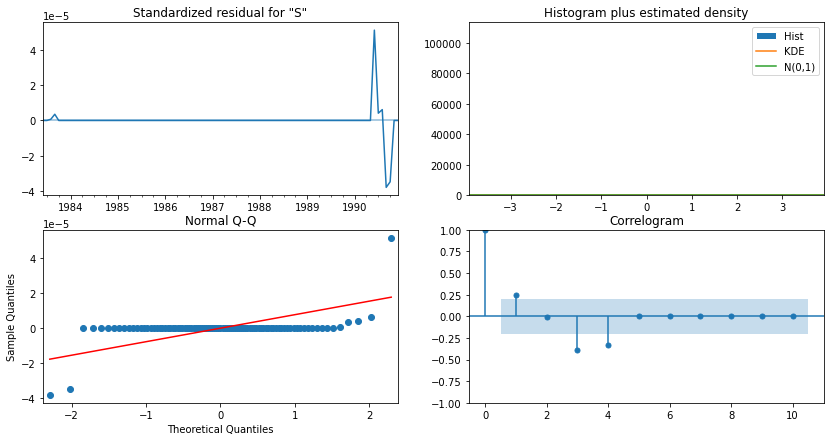

In [208]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

In [209]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(1, 1, 3),
                                seasonal_order=(0, 0, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 3)x(0, 0, 3, 12)   Log Likelihood                   0.000
Date:                            Sun, 17 Apr 2022   AIC                             16.000
Time:                                    18:12:06   BIC                             36.087
Sample:                                01-31-1980   HQIC                            24.104
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          6.3599         -0       -inf      0.000       6.360       6.360
ma.L1          2.4977         -0   

In [210]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(3, 1, 3),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 0, [], 12)   Log Likelihood                -683.749
Date:                             Sun, 17 Apr 2022   AIC                           1387.497
Time:                                     18:12:14   BIC                           1412.715
Sample:                                 01-31-1980   HQIC                          1397.675
                                      - 12-31-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6747      0.142    -11.813      0.000      -1.953      -1.397
ar.L2         -0.7437      

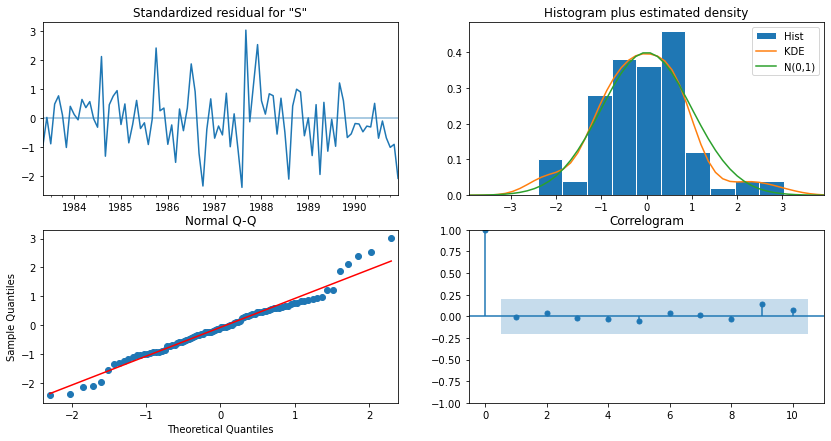

In [211]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

In [212]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(stest))

In [213]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1342.186415  394.835170     568.323702    2116.049128
1991-02-28  1350.586558  419.604684     528.176490    2172.996626
1991-03-31  1578.501066  421.175673     753.011915    2403.990217
1991-04-30  1667.747910  432.685709     819.699504    2515.796315
1991-05-31  1320.611028  432.719141     472.497096    2168.724959

In [214]:
rmse = mse(stest['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 611.2714450638045 
MAPE: 26.82019099782973


In [215]:
resultsDf_9 = pd.DataFrame({'Sparkling Test RMSE': [rmse],'Sparkling Test MAPE':mape},index=['SARIMA(3, 1, 3)(3,0,0,12)'])
resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf_9


Sparkling Test RMSE  Sparkling Test MAPE
SARIMA(3, 1, 3)(3,0,0,12)           611.271445            26.820191

In [216]:
resultsDf

Sparkling Test RMSE  Sparkling-Alpha  \
RegressionOnTime                        1389.135175              NaN   
NaiveModel                              3864.279352              NaN   
AverageModel                            1275.081804              NaN   
2pointTrailingMovingAverage              813.400684              NaN   
4pointTrailingMovingAverage             1156.589694              NaN   
6pointTrailingMovingAverage             1283.927428              NaN   
9pointTrailingMovingAverage             1346.278315              NaN   
Simple Exponential Smoothening          1338.008384          0.07029   
Holt's Model                            5291.879833          0.66500   
Holt's Winter Model                      404.286809          0.11134   
ARIMA(2, 1, 3)                                  NaN              NaN   
ARIMA(2, 1, 2)                                  NaN              NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)                    NaN              NaN   
SARIMA(2, 1, 2)(2, 1, 2, 12)                    NaN              NaN   
ARIMA(2, 1, 2)                          1299.979640              NaN   
ARIMA(0, 1, 0)                          3864.279352              NaN   
SARIMA(3, 1, 3)(3,0,0,12)                611.271445              NaN   

                                Sparkling-Beta  Sparkling-Gamma  \
RegressionOnTime                           NaN              NaN   
NaiveModel                                 NaN              NaN   
AverageModel                               NaN              NaN   
2pointTrailingMovingAverage                NaN              NaN   
4pointTrailingMovingAverage                NaN              NaN   
6pointTrailingMovingAverage                NaN              NaN   
9pointTrailingMovingAverage                NaN              NaN   
Simple Exponential Smoothening             NaN              NaN   
Holt's Model                           0.00010              NaN   
Holt's Winter Model                    0.04951          0.36208   
ARIMA(2, 1, 3)                             NaN              NaN   
ARIMA(2, 1, 2)                             NaN              NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)               NaN              NaN   
SARIMA(2, 1, 2)(2, 1, 2, 12)               NaN              NaN   
ARIMA(2, 1, 2)                             NaN              NaN   
ARIMA(0, 1, 0)                             NaN              NaN   
SARIMA(3, 1, 3)(3,0,0,12)                  NaN              NaN   

                                Rose Test RMSE Rose-Alpha Rose-Beta  \
RegressionOnTime                     15.268955        NaN       NaN   
NaiveModel                           79.718773        NaN       NaN   
AverageModel                         53.460570        NaN       NaN   
2pointTrailingMovingAverage          11.529278        NaN       NaN   
4pointTrailingMovingAverage          14.451403        NaN       NaN   
6pointTrailingMovingAverage          14.566327        NaN       NaN   
9pointTrailingMovingAverage          14.727630        NaN       NaN   
Simple Exponential Smoothening       36.796241    0.09875       NaN   
Holt's Model                         15.268944   1.49e-08  1.66e-10   
Holt's Winter Model                  15.268944    0.07151   0.04529   
ARIMA(2, 1, 3)                       36.812984        NaN       NaN   
ARIMA(2, 1, 2)                       36.871197        NaN       NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)         18.881910        NaN       NaN   
SARIMA(2, 1, 2)(2, 1, 2, 12)         16.550894        NaN       NaN   
ARIMA(2, 1, 2)                             NaN        NaN       NaN   
ARIMA(0, 1, 0)                             NaN        NaN       NaN   
SARIMA(3, 1, 3)(3,0,0,12)                  NaN        NaN       NaN   

                                Rose-Gamma  Rose Test MAPE  \
RegressionOnTime                       NaN             NaN   
NaiveModel                             NaN             NaN   
AverageModel                           NaN             NaN   
2

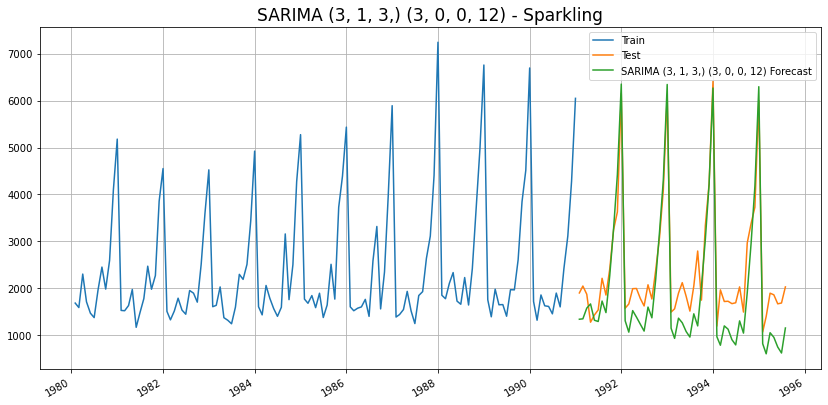

In [217]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
# plt.plot(predicted_auto_SARIMA,label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
# predicted_auto_SARIMA.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA (3, 1, 3,) (3, 0, 0, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA (3, 1, 3,) (3, 0, 0, 12) - Sparkling', fontsize=17);


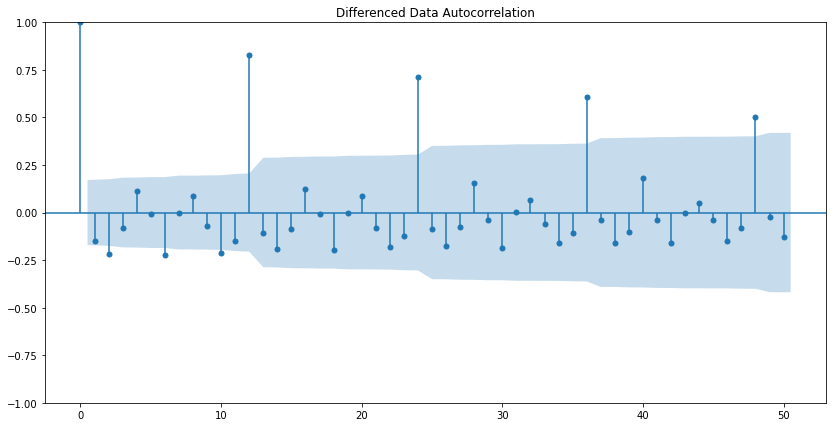

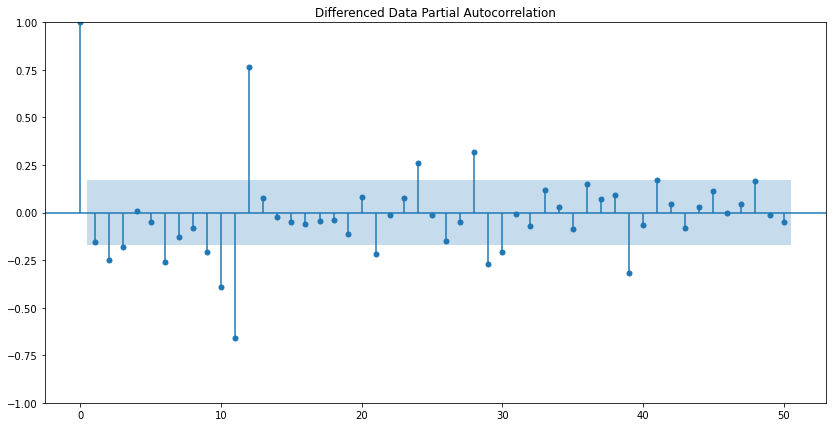

In [218]:
plot_acf(strain['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(strain['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [219]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -910.491
Date:                            Sun, 17 Apr 2022   AIC                           1822.982
Time:                                    18:12:16   BIC                           1825.753
Sample:                                01-31-1980   HQIC                          1824.107
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.945e+05   2.51e+04     11.725      0.000    2.45e+05    3.44e+05
Ljung-Box (L1) (Q):                

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


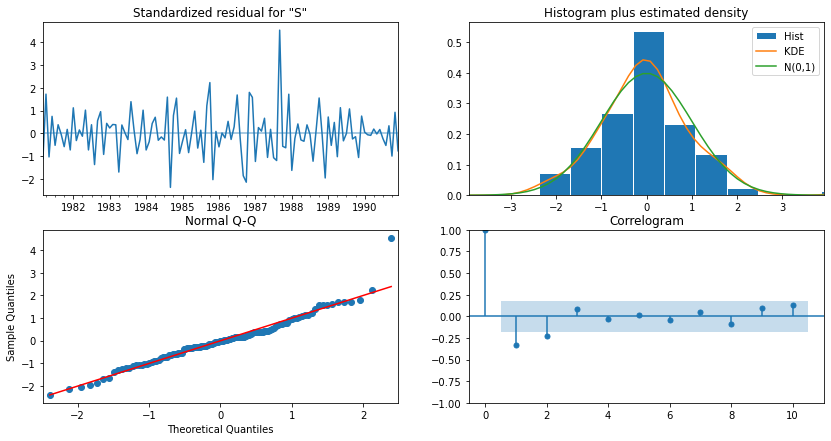

In [220]:
results_manual_SARIMA.plot_diagnostics();

In [221]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(stest))
                                                             
#predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(stest))

#predicted_manual_SARIMA2 = results_manual_SARIMA2.get_forecast(steps=len(stest))

In [222]:
rmse = mse(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2114.5317856980237 
MAPE: 96.44504522010861


In [223]:
resultsDf_9 = pd.DataFrame({'Sparkling Test RMSE': [rmse],'Sparkling Test MAPE':mape},index=['SARIMA(0, 1, 0)(0,1,0,12)'])
resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf_9


Sparkling Test RMSE  Sparkling Test MAPE
SARIMA(0, 1, 0)(0,1,0,12)          2114.531786            96.445045

In [224]:
resultsDf

Sparkling Test RMSE  Sparkling-Alpha  \
RegressionOnTime                        1389.135175              NaN   
NaiveModel                              3864.279352              NaN   
AverageModel                            1275.081804              NaN   
2pointTrailingMovingAverage              813.400684              NaN   
4pointTrailingMovingAverage             1156.589694              NaN   
6pointTrailingMovingAverage             1283.927428              NaN   
9pointTrailingMovingAverage             1346.278315              NaN   
Simple Exponential Smoothening          1338.008384          0.07029   
Holt's Model                            5291.879833          0.66500   
Holt's Winter Model                      404.286809          0.11134   
ARIMA(2, 1, 3)                                  NaN              NaN   
ARIMA(2, 1, 2)                                  NaN              NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)                    NaN              NaN   
SARIMA(2, 1, 2)(2, 1, 2, 12)                    NaN              NaN   
ARIMA(2, 1, 2)                          1299.979640              NaN   
ARIMA(0, 1, 0)                          3864.279352              NaN   
SARIMA(3, 1, 3)(3,0,0,12)                611.271445              NaN   
SARIMA(0, 1, 0)(0,1,0,12)               2114.531786              NaN   

                                Sparkling-Beta  Sparkling-Gamma  \
RegressionOnTime                           NaN              NaN   
NaiveModel                                 NaN              NaN   
AverageModel                               NaN              NaN   
2pointTrailingMovingAverage                NaN              NaN   
4pointTrailingMovingAverage                NaN              NaN   
6pointTrailingMovingAverage                NaN              NaN   
9pointTrailingMovingAverage                NaN              NaN   
Simple Exponential Smoothening             NaN              NaN   
Holt's Model                           0.00010              NaN   
Holt's Winter Model                    0.04951          0.36208   
ARIMA(2, 1, 3)                             NaN              NaN   
ARIMA(2, 1, 2)                             NaN              NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)               NaN              NaN   
SARIMA(2, 1, 2)(2, 1, 2, 12)               NaN              NaN   
ARIMA(2, 1, 2)                             NaN              NaN   
ARIMA(0, 1, 0)                             NaN              NaN   
SARIMA(3, 1, 3)(3,0,0,12)                  NaN              NaN   
SARIMA(0, 1, 0)(0,1,0,12)                  NaN              NaN   

                                Rose Test RMSE Rose-Alpha Rose-Beta  \
RegressionOnTime                     15.268955        NaN       NaN   
NaiveModel                           79.718773        NaN       NaN   
AverageModel                         53.460570        NaN       NaN   
2pointTrailingMovingAverage          11.529278        NaN       NaN   
4pointTrailingMovingAverage          14.451403        NaN       NaN   
6pointTrailingMovingAverage          14.566327        NaN       NaN   
9pointTrailingMovingAverage          14.727630        NaN       NaN   
Simple Exponential Smoothening       36.796241    0.09875       NaN   
Holt's Model                         15.268944   1.49e-08  1.66e-10   
Holt's Winter Model                  15.268944    0.07151   0.04529   
ARIMA(2, 1, 3)                       36.812984        NaN       NaN   
ARIMA(2, 1, 2)                       36.871197        NaN       NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)         18.881910        NaN       NaN   
SARIMA(2, 1, 2)(2, 1, 2, 12)         16.550894        NaN       NaN   
ARIMA(2, 1, 2)                             NaN        NaN       NaN   
ARIMA(0, 1, 0)                             NaN        NaN       NaN   
SARIMA(3, 1, 3)(3,0,0,12)                  NaN        NaN       NaN   
SARIMA(0, 1, 0)(0,1,0,12)                  NaN        NaN       NaN   

                                Rose-Ga

In [225]:
resultsDf=resultsDf[["Sparkling-Alpha","Sparkling-Beta","Sparkling-Gamma","Sparkling Test RMSE","Sparkling Test MAPE","Rose-Alpha","Rose-Beta","Rose-Gamma","Rose Test RMSE","Rose Test MAPE"]]

In [226]:
resultsDf

Sparkling-Alpha  Sparkling-Beta  \
RegressionOnTime                            NaN             NaN   
NaiveModel                                  NaN             NaN   
AverageModel                                NaN             NaN   
2pointTrailingMovingAverage                 NaN             NaN   
4pointTrailingMovingAverage                 NaN             NaN   
6pointTrailingMovingAverage                 NaN             NaN   
9pointTrailingMovingAverage                 NaN             NaN   
Simple Exponential Smoothening          0.07029             NaN   
Holt's Model                            0.66500         0.00010   
Holt's Winter Model                     0.11134         0.04951   
ARIMA(2, 1, 3)                              NaN             NaN   
ARIMA(2, 1, 2)                              NaN             NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)                NaN             NaN   
SARIMA(2, 1, 2)(2, 1, 2, 12)                NaN             NaN   
ARIMA(2, 1, 2)                              NaN             NaN   
ARIMA(0, 1, 0)                              NaN             NaN   
SARIMA(3, 1, 3)(3,0,0,12)                   NaN             NaN   
SARIMA(0, 1, 0)(0,1,0,12)                   NaN             NaN   

                                Sparkling-Gamma  Sparkling Test RMSE  \
RegressionOnTime                            NaN          1389.135175   
NaiveModel                                  NaN          3864.279352   
AverageModel                                NaN          1275.081804   
2pointTrailingMovingAverage                 NaN           813.400684   
4pointTrailingMovingAverage                 NaN          1156.589694   
6pointTrailingMovingAverage                 NaN          1283.927428   
9pointTrailingMovingAverage                 NaN          1346.278315   
Simple Exponential Smoothening              NaN          1338.008384   
Holt's Model                                NaN          5291.879833   
Holt's Winter Model                     0.36208           404.286809   
ARIMA(2, 1, 3)                              NaN                  NaN   
ARIMA(2, 1, 2)                              NaN                  NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)                NaN                  NaN   
SARIMA(2, 1, 2)(2, 1, 2, 12)                NaN                  NaN   
ARIMA(2, 1, 2)                              NaN          1299.979640   
ARIMA(0, 1, 0)                              NaN          3864.279352   
SARIMA(3, 1, 3)(3,0,0,12)                   NaN           611.271445   
SARIMA(0, 1, 0)(0,1,0,12)                   NaN          2114.531786   

                                Sparkling Test MAPE Rose-Alpha Rose-Beta  \
RegressionOnTime                                NaN        NaN       NaN   
NaiveModel                                      NaN        NaN       NaN   
AverageModel                                    NaN        NaN       NaN   
2pointTrailingMovingAverage                     NaN        NaN       NaN   
4pointTrailingMovingAverage                     NaN        NaN       NaN   
6pointTrailingMovingAverage                     NaN        NaN       NaN   
9pointTrailingMovingAverage                     NaN        NaN       NaN   
Simple Exponential Smoothening                  NaN    0.09875       NaN   
Holt's Model                                    NaN   1.49e-08  1.66e-10   
Holt's Winter Model                             NaN    0.07151   0.04529   
ARIMA(2, 1, 3)                                  NaN        NaN       NaN   
ARIMA(2, 1, 2)                                  NaN        NaN       NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)                    NaN        NaN       NaN   
SARIMA(2, 1, 2)(2, 1, 2, 12)                    NaN        NaN       NaN   
ARIMA(2, 1, 2)                            47.099986        NaN       NaN   
ARIMA(0, 1, 0)                           201.327650        NaN       NaN   
SARIMA(3, 1, 3)(3,0,0,12)                 26.820191        NaN       NaN   
SARIMA(0, 1, 0)(0,1,0

Text(0.5, 1.0, 'SARIMA (0, 1, 0) (0, 1, 0, 12) Forecast - SPARKLING')

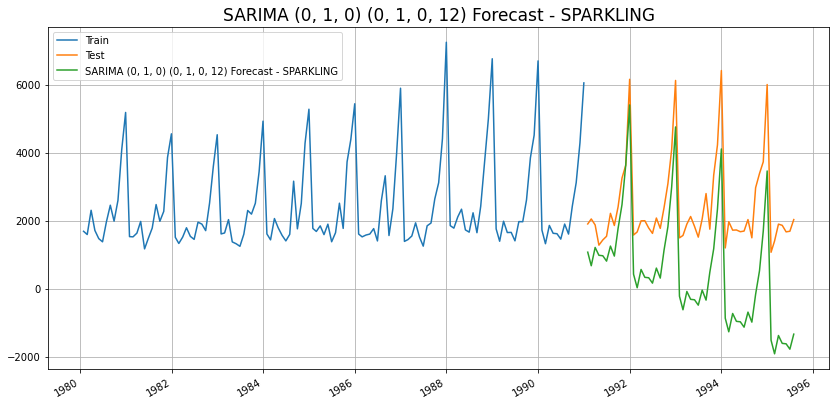

In [227]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (0, 1, 0, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (0, 1, 0, 12) Forecast - SPARKLING', fontsize=17)

In [228]:
full_data_model = sm.tsa.statespace.SARIMAX(sparkling['Sparkling'],
                                order=(3,1,3),
                                seasonal_order=(3,0,0,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(3, 0, [], 12)   Log Likelihood               -1088.203
Date:                             Sun, 17 Apr 2022   AIC                           2196.407
Time:                                     18:12:30   BIC                           2226.311
Sample:                                 01-31-1980   HQIC                          2208.557
                                      - 07-31-1995                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5616      1.695     -0.331      0.740      -3.883       2.760
ar.L2         -0.1007      

In [229]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [230]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1935.806951  394.540194    1162.522380    2709.091522
1995-09-30  2455.356276  399.261740    1672.817645    3237.894907
1995-10-31  3303.800681  399.350933    2521.087235    4086.514128
1995-11-30  3954.726521  400.592923    3169.578819    4739.874224
1995-12-31  6171.973119  400.630712    5386.751352    6957.194885

In [231]:
rmse = mse(sparkling['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 537.0342514037656


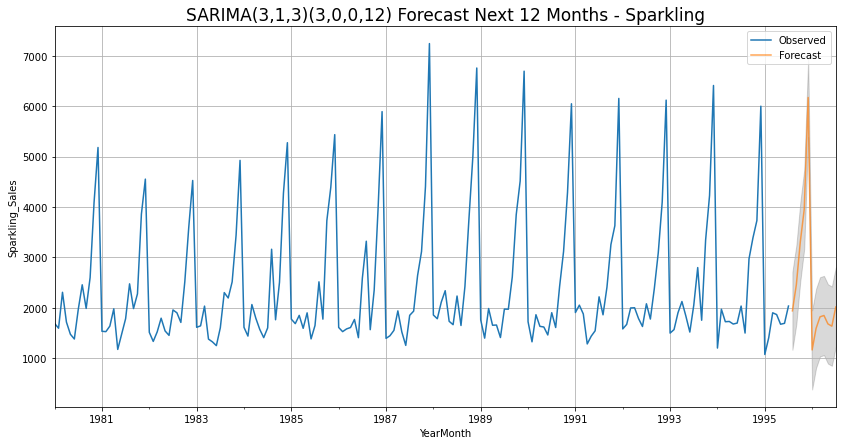

In [232]:

# plot the forecast along with the confidence band

axis = sparkling['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('YearMonth')
axis.set_ylabel('Sparkling_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(3,1,3)(3,0,0,12) Forecast Next 12 Months - Sparkling', fontsize=17);
plt.show()

In [233]:
full_data_model = sm.tsa.statespace.SARIMAX(rose['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -587.531
Date:                            Sun, 17 Apr 2022   AIC                           1193.062
Time:                                    18:12:35   BIC                           1219.976
Sample:                                01-31-1980   HQIC                          1203.997
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8649      0.101     -8.559      0.000      -1.063      -0.667
ar.L2          0.0340      0.091   

In [234]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [235]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  43.083658  12.674047      18.242983      67.924333
1995-09-30  43.341993  12.959866      17.941122      68.742864
1995-10-31  45.827548  12.963865      20.418839      71.236258
1995-11-30  57.397321  13.124632      31.673516      83.121126
1995-12-31  85.074835  13.133466      59.333714     110.815955

In [236]:
rmse = mse(rose['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 35.91110673976319


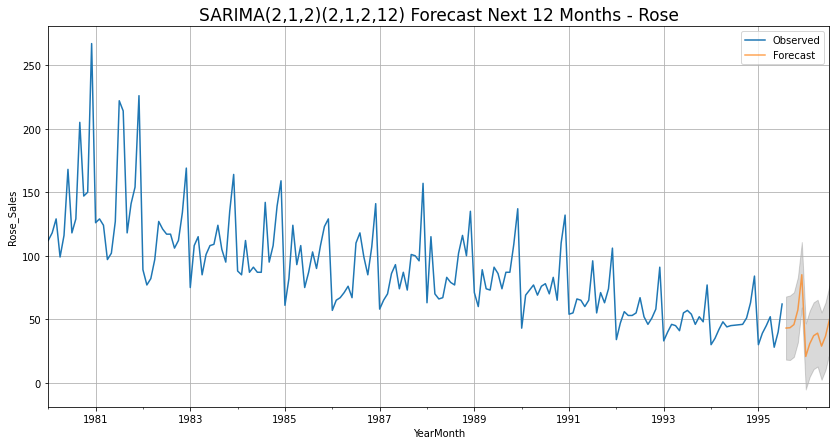

In [237]:

# plot the forecast along with the confidence band

axis = rose['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose', fontsize=17);
plt.show()

# FINAL FORECAST

In [238]:
TES_final = sparkling.copy()

In [239]:
S_final_TES = ExponentialSmoothing(TES_final['Sparkling'],trend='additive',seasonal='multiplicative',freq='M',initialization_method='estimated')

In [240]:
S_final_TES_autofit = S_final_TES.fit(optimized=True)

In [241]:
S_final_TES_autofit.params

{'smoothing_level': 0.075673528755637,
 'smoothing_trend': 0.06486886393531484,
 'smoothing_seasonal': 0.27372628410585276,
 'damping_trend': nan,
 'initial_level': 2356.203665158414,
 'initial_trend': -17.101169323168893,
 'initial_seasons': array([0.71312236, 0.67565479, 0.88301671, 0.78979355, 0.65342823,
        0.63790824, 0.87152158, 1.13234469, 0.91171613, 1.24967493,
        1.89649585, 2.46275116]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [242]:
predicted_final_sparkling = S_final_TES_autofit.forecast(steps=12)

In [243]:
predicted_final_sparkling

1995-08-31    1931.948827
1995-09-30    2351.014431
1995-10-31    3178.501530
1995-11-30    3916.626178
1995-12-31    5982.802931
1996-01-31    1356.447923
1996-02-29    1597.725021
1996-03-31    1828.530596
1996-04-30    1788.993714
1996-05-31    1639.705581
1996-06-30    1553.839348
1996-07-31    1962.350245
Freq: M, dtype: float64

In [244]:
pred_1 = pd.DataFrame({'lower_CI':predicted_final_sparkling - 1.96*np.std(S_final_TES_autofit.resid,ddof=1),
                          'prediction':predicted_final_sparkling,
                          'upper_ci': predicted_final_sparkling + 1.96*np.std(S_final_TES_autofit.resid,ddof=1)})
pred_1

lower_CI   prediction     upper_ci
1995-08-31  1253.478518  1931.948827  2610.419137
1995-09-30  1672.544122  2351.014431  3029.484741
1995-10-31  2500.031221  3178.501530  3856.971840
1995-11-30  3238.155869  3916.626178  4595.096488
1995-12-31  5304.332622  5982.802931  6661.273241
1996-01-31   677.977613  1356.447923  2034.918233
1996-02-29   919.254712  1597.725021  2276.195331
1996-03-31  1150.060287  1828.530596  2507.000906
1996-04-30  1110.523404  1788.993714  2467.464024
1996-05-31   961.235271  1639.705581  2318.175891
1996-06-30   875.369039  1553.839348  2232.309658
1996-07-31  1283.879936  1962.350245  2640.820555

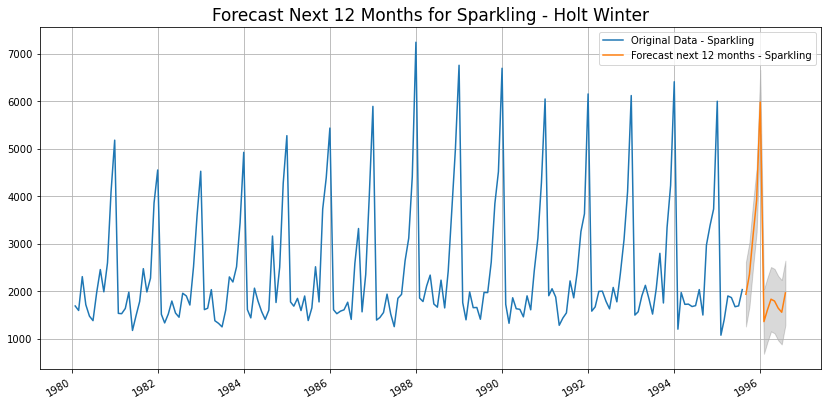

In [245]:
plt.plot(sparkling['Sparkling'], label='Original Data - Sparkling')

ax =predicted_final_sparkling.plot(label='Forecast next 12 months - Sparkling')


ax.fill_between(pred_1.index,pred_1['lower_CI'], pred_1['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Sparkling - Holt Winter', fontsize=17);

In [246]:
MovingAverage_final = rose.copy()

In [247]:
MovingAverage_final['Trailing_2'] = MovingAverage_final['Rose'].rolling(2).mean()

MovingAverage_final

Rose  Trailing_2
Time_Stamp                   
1980-01-31  112.0         NaN
1980-02-29  118.0       115.0
1980-03-31  129.0       123.5
1980-04-30   99.0       114.0
1980-05-31  116.0       107.5
...           ...         ...
1995-03-31   45.0        42.0
1995-04-30   52.0        48.5
1995-05-31   28.0        40.0
1995-06-30   40.0        34.0
1995-07-31   62.0        51.0

[187 rows x 2 columns]

In [248]:
date1 = pd.date_range(start='8/1/1995', end='8/1/1996', freq='M')
date1

DatetimeIndex(['1995-08-31', '1995-09-30', '1995-10-31', '1995-11-30',
               '1995-12-31', '1996-01-31', '1996-02-29', '1996-03-31',
               '1996-04-30', '1996-05-31', '1996-06-30', '1996-07-31'],
              dtype='datetime64[ns]', freq='M')

In [249]:
df2=pd.DataFrame(index=date1)

In [250]:
final_dataset=MovingAverage_final.append(df2)


In [251]:
final_dataset

Rose  Trailing_2
1980-01-31  112.0         NaN
1980-02-29  118.0       115.0
1980-03-31  129.0       123.5
1980-04-30   99.0       114.0
1980-05-31  116.0       107.5
...           ...         ...
1996-03-31    NaN         NaN
1996-04-30    NaN         NaN
1996-05-31    NaN         NaN
1996-06-30    NaN         NaN
1996-07-31    NaN         NaN

[199 rows x 2 columns]

In [252]:
for i in range(186,198):
        final_dataset.iloc[i+1,1]=(final_dataset.iloc[i,1]+final_dataset.iloc[i-1,1])/2

In [253]:
df1=final_dataset.tail(12).copy()
df1.drop("Rose",axis=1,inplace=True)
df1

Trailing_2
1995-08-31   42.500000
1995-09-30   46.750000
1995-10-31   44.625000
1995-11-30   45.687500
1995-12-31   45.156250
1996-01-31   45.421875
1996-02-29   45.289062
1996-03-31   45.355469
1996-04-30   45.322266
1996-05-31   45.338867
1996-06-30   45.330566
1996-07-31   45.334717

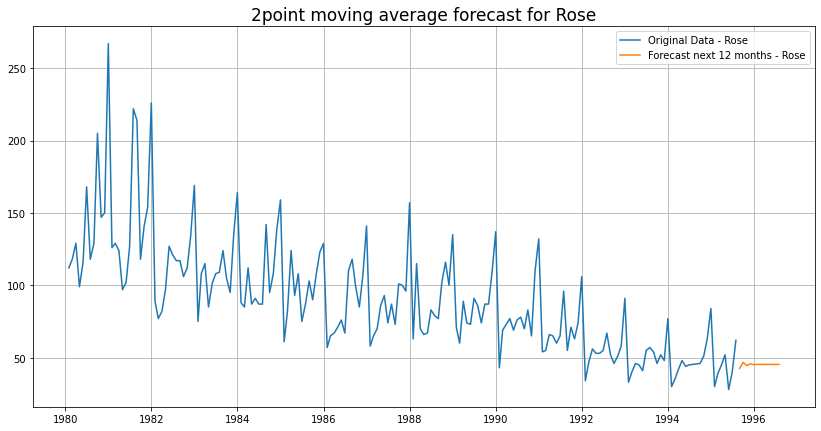

In [254]:
plt.plot(rose['Rose'], label='Original Data - Rose')

plt.plot(df1,label='Forecast next 12 months - Rose')


#ax.fill_between(pred_1.index,pred_1['lower_CI'], pred_1['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('2point moving average forecast for Rose', fontsize=17);

In [255]:
TES_final2 = rose.copy()
R_final_TES = ExponentialSmoothing(TES_final2['Rose'],trend='additive',seasonal='multiplicative',freq='M',initialization_method='estimated')
R_final_TES_autofit = R_final_TES.fit(optimized=True)
R_final_TES_autofit.params

{'smoothing_level': 0.10705971929184599,
 'smoothing_trend': 6.614305150337013e-07,
 'smoothing_seasonal': 4.6583859805827e-05,
 'damping_trend': nan,
 'initial_level': 171.24192361327445,
 'initial_trend': -0.6501522170558699,
 'initial_seasons': array([0.6301466 , 0.71566258, 0.78944214, 0.70544328, 0.77113059,
        0.8351802 , 0.93703845, 0.96559044, 0.91172159, 0.90108466,
        1.0459621 , 1.4418717 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [256]:
predicted_final_Rose = R_final_TES_autofit.forecast(steps=12)

In [257]:
pred_2 = pd.DataFrame({'lower_CI':predicted_final_Rose - 1.96*np.std(R_final_TES_autofit.resid,ddof=1),
                          'prediction':predicted_final_Rose,
                          'upper_ci': predicted_final_Rose + 1.96*np.std(R_final_TES_autofit.resid,ddof=1)})
pred_2

lower_CI  prediction   upper_ci
1995-08-31  15.926041   47.557162  79.188282
1995-09-30  12.681772   44.312893  75.944013
1995-10-31  11.579434   43.210554  74.841675
1995-11-30  17.846966   49.478086  81.109206
1995-12-31  35.637076   67.268197  98.899317
1996-01-31  -2.643475   28.987645  60.618766
1996-02-29   0.826479   32.457599  64.088720
1996-03-31   3.659674   35.290795  66.921915
1996-04-30  -0.552545   31.078575  62.709695
1996-05-31   1.837475   33.468595  65.099716
1996-06-30   4.074369   35.705489  67.336610
1996-07-31   7.819952   39.451072  71.082193

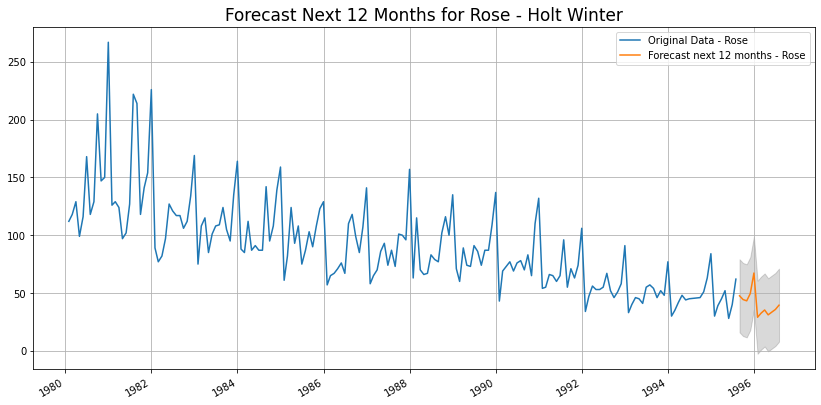

In [258]:
plt.plot(rose['Rose'], label='Original Data - Rose')

ax =predicted_final_Rose.plot(label='Forecast next 12 months - Rose')


ax.fill_between(pred_1.index,pred_2['lower_CI'], pred_2['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Rose - Holt Winter', fontsize=17);